# HR Analytics Project- Understanding the Attrition in HR

# Importing Libraries

In [2]:
# Data Analyse & Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Preprocessor, scaler, Sampler, Decomposition
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation & Metrics
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Saving Model
import pickle

#Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

D:\data science\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Importing Dataset

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df


Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

# Data Inspection

In [4]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
#checking Dimension of Data
print("In our dataset we have {} rows & {} columns".format(*df.shape))
print('\n')

# Column Names in our Dataset
print("These are the columns present in our dataset: \n",df.columns)

In our dataset we have 1470 rows & 35 columns


These are the columns present in our dataset: 
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [6]:
#Checking datatypes in our dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# Checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Missing & Duplicate Values

In [8]:
# Checking for Missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

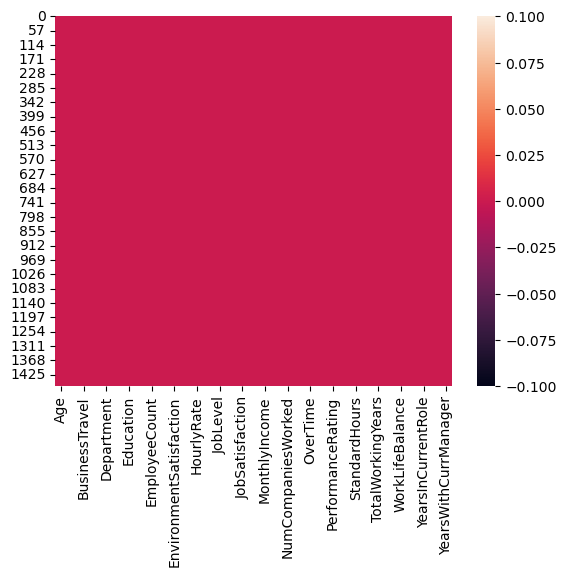

In [9]:
#Visualizing it
sns.heatmap(df.isnull())
plt.show()

# Statistical Summary

In [10]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [11]:
#Dropping columns
df.drop(columns=['EmployeeCount','StandardHours', 'EmployeeNumber', 'Over18'], axis=1, inplace=True)
print('After dropping we have {} rows & {} columns'.format(*df.shape))

After dropping we have 1470 rows & 31 columns


In [12]:
# Separating Numerical & Categorical columns

cat_col = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",cat_col)
print("\n")

num_col = df.select_dtypes(include=['int64']).columns
print("Numerical columns are:",num_col)

Categorical columns are: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


Numerical columns are: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [13]:
#Unique Values in each columns in our dataset
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [14]:
# Value Counts of categorical columns in our Dataframe
for i in cat_col:
    print(df[i].value_counts())
    print("\n")

Attrition
No     1233
Yes     237
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Gender
Male      882
Female    588
Name: count, dtype: int64


JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


OverTime
No    

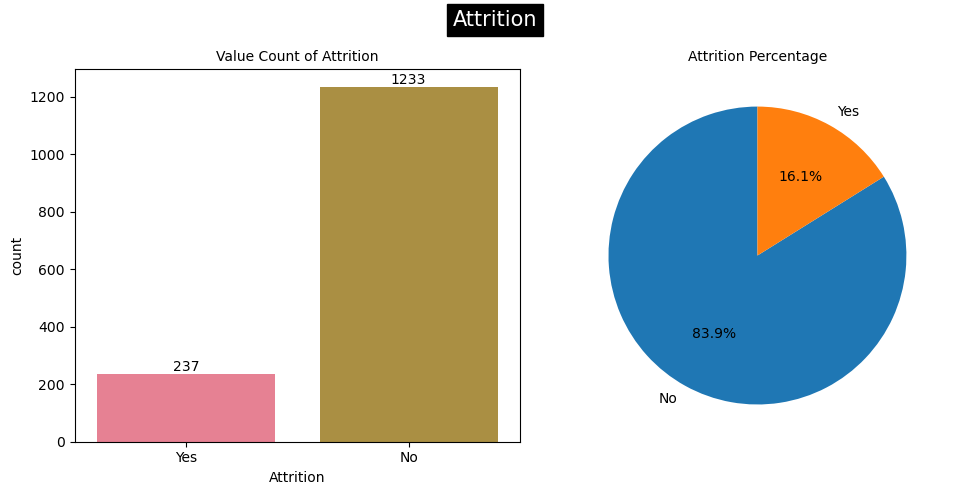

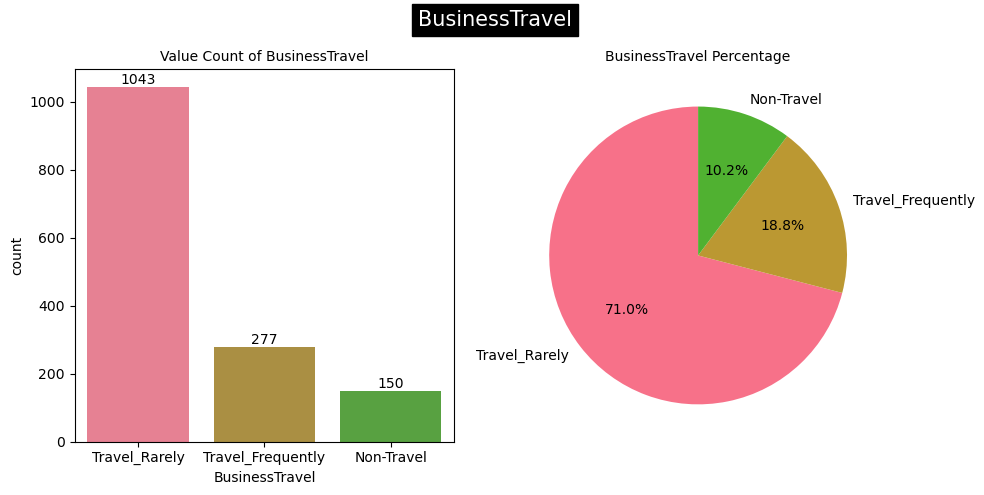

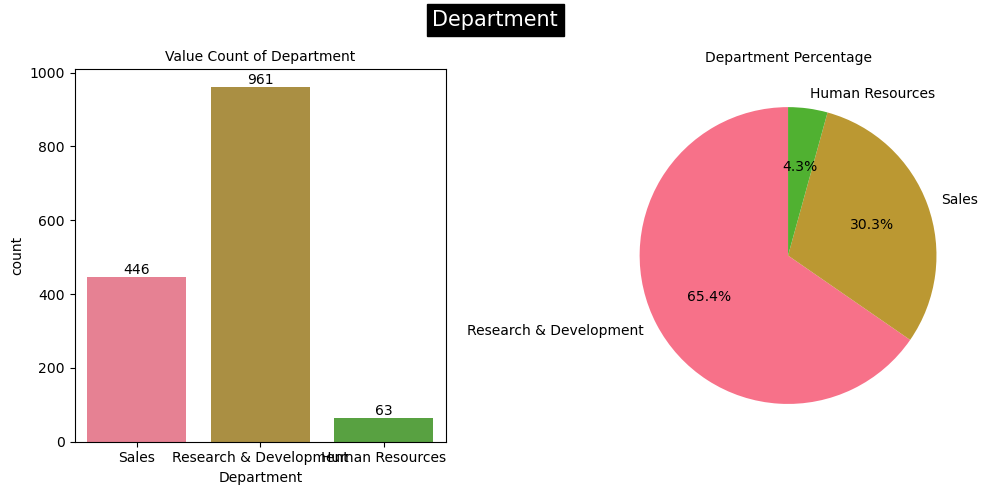

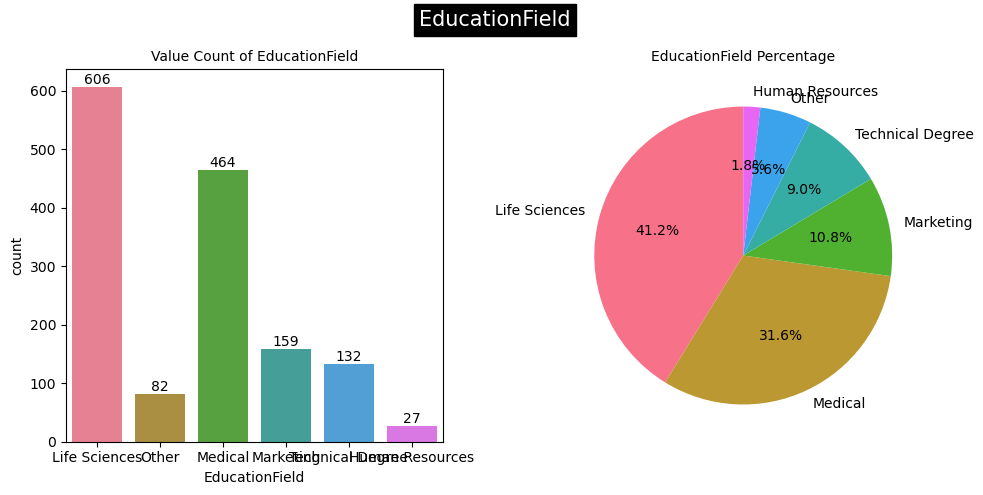

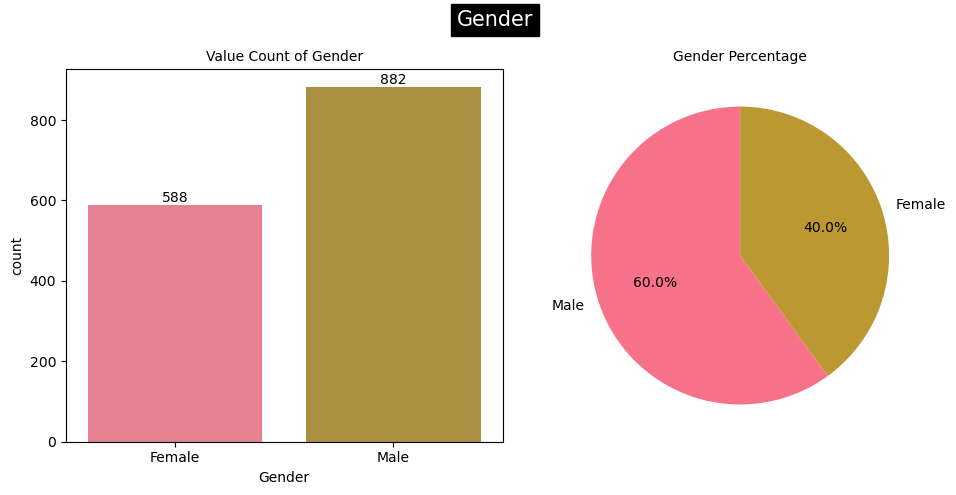

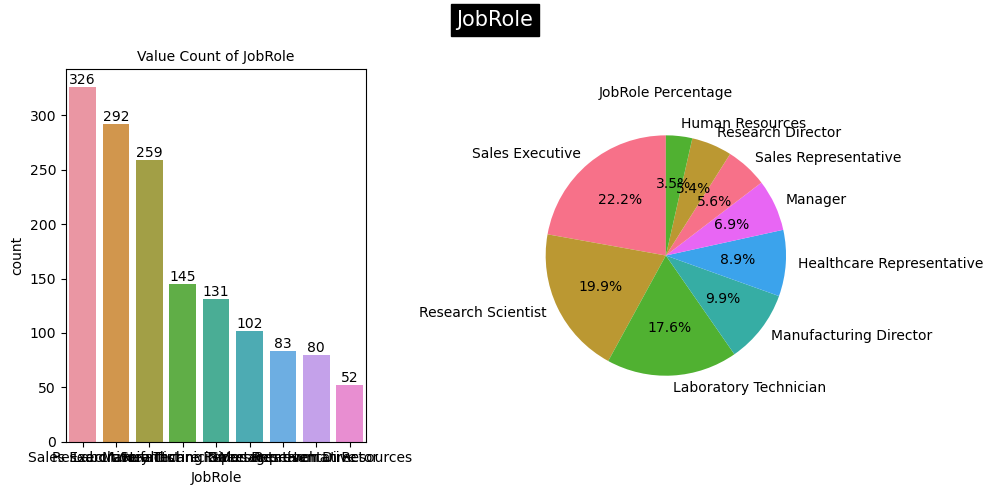

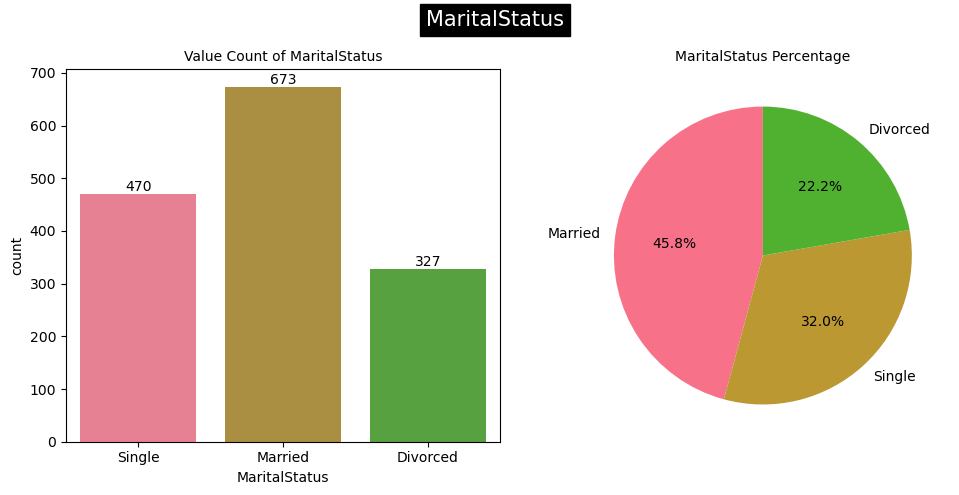

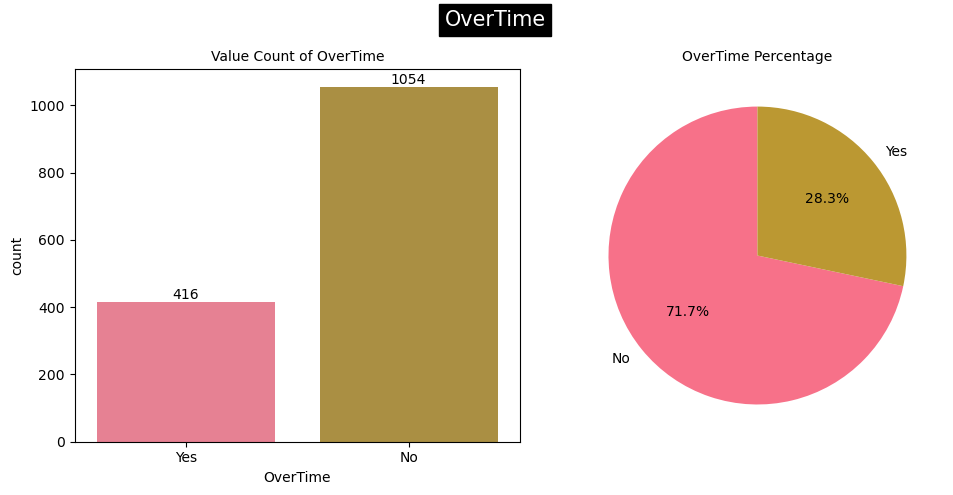

In [15]:
# Create a subplot layout with two subplots side by side

for i, column in enumerate(cat_col):
    
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    sns.set_palette("husl")
    
    # Plot the countplot
    ax = sns.countplot(x=column, data=df, ax=axes[0])
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_title(f'Value Count of {column}', fontsize=10)

    # Plot the pie chart
    column_counts = df[column].value_counts()
    ax = axes[1]
    ax.pie(column_counts, labels=column_counts.index, autopct='%0.1f%%', startangle=90)
    ax.set_title(f'{column} Percentage', fontsize=10)
    
    fig.suptitle(column, fontsize=15, backgroundcolor='black',color='white')
    plt.tight_layout()
    plt.show()

In [16]:
for i in num_col:
    print(df[i].value_counts())
    print("\n")

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64


Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64


En

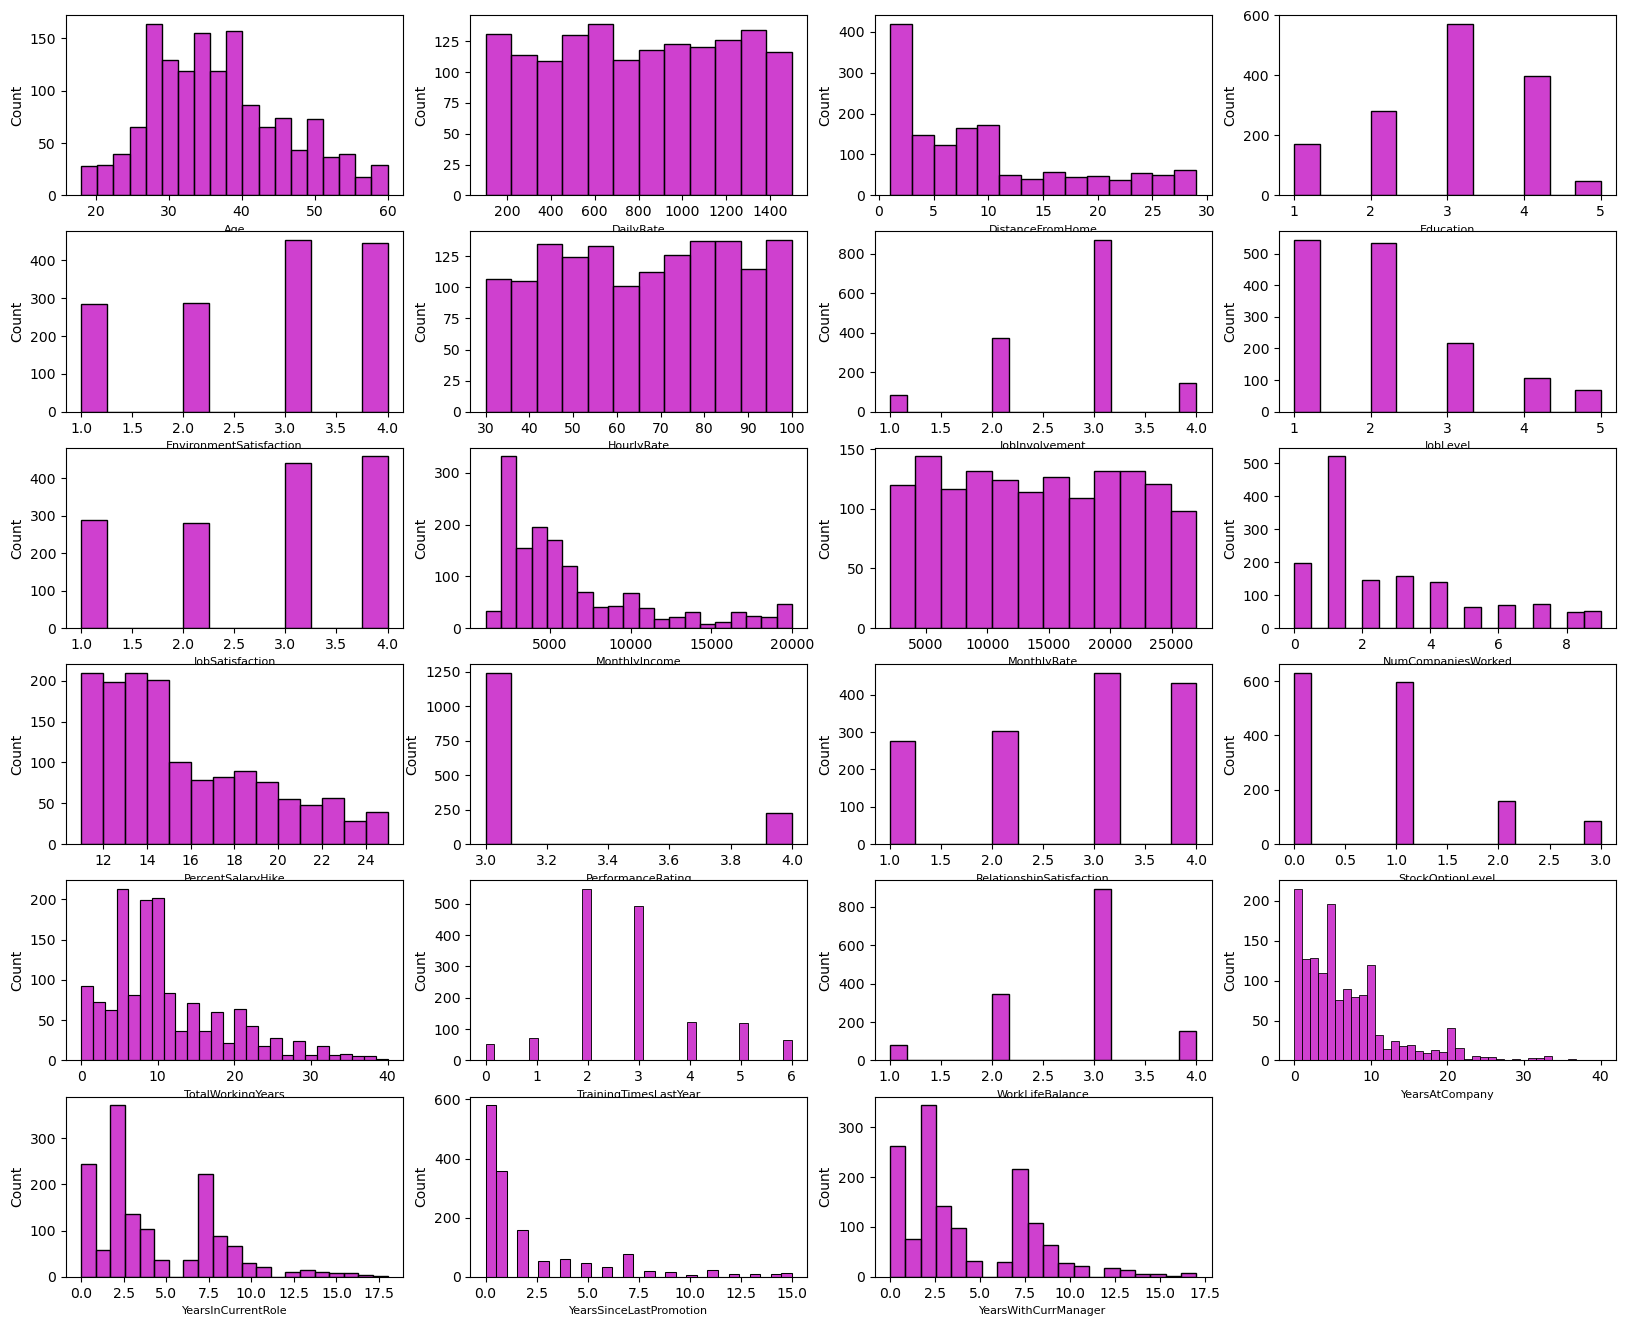

In [17]:
#Visiualizing it using Histogram
plt.figure(figsize=(20,22), facecolor='white')
plotnumber =1
for column in num_col:
    if plotnumber <=35:
        ax = plt.subplot(8,4,plotnumber)
        sns.histplot(df[column], color='m')
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.tight_layout
plt.show()

In [18]:
#Removing Attrition variable from categorical list
cat_col=cat_col[1:]

# Iterate through each categorical column
for col in cat_col:
    
    # Group by 'Attrition' and the current categorical column
    attrition_counts = df.groupby(['Attrition', col])[col].count()
    
    # Calculate the total count for each category in the current column
    total_counts = df.groupby(col)['Attrition'].count()
    
    # Calculate the percentage of 'Attrition' for each category in the current column
    attrition_percentages = (attrition_counts / total_counts * 100).round(2)
    
    # Create a DataFrame to display the counts and percentages
    attrition_df = pd.concat([attrition_counts, attrition_percentages], axis=1, keys=['Count', 'Percentage'])
    
    # Print the results
    print(attrition_df)
    print('*'*60)

                             Count  Percentage
Attrition BusinessTravel                      
No        Non-Travel           138       92.00
          Travel_Frequently    208       75.09
          Travel_Rarely        887       85.04
Yes       Non-Travel            12        8.00
          Travel_Frequently     69       24.91
          Travel_Rarely        156       14.96
************************************************************
                                  Count  Percentage
Attrition Department                               
No        Human Resources            51       80.95
          Research & Development    828       86.16
          Sales                     354       79.37
Yes       Human Resources            12       19.05
          Research & Development    133       13.84
          Sales                      92       20.63
************************************************************
                            Count  Percentage
Attrition EducationField                

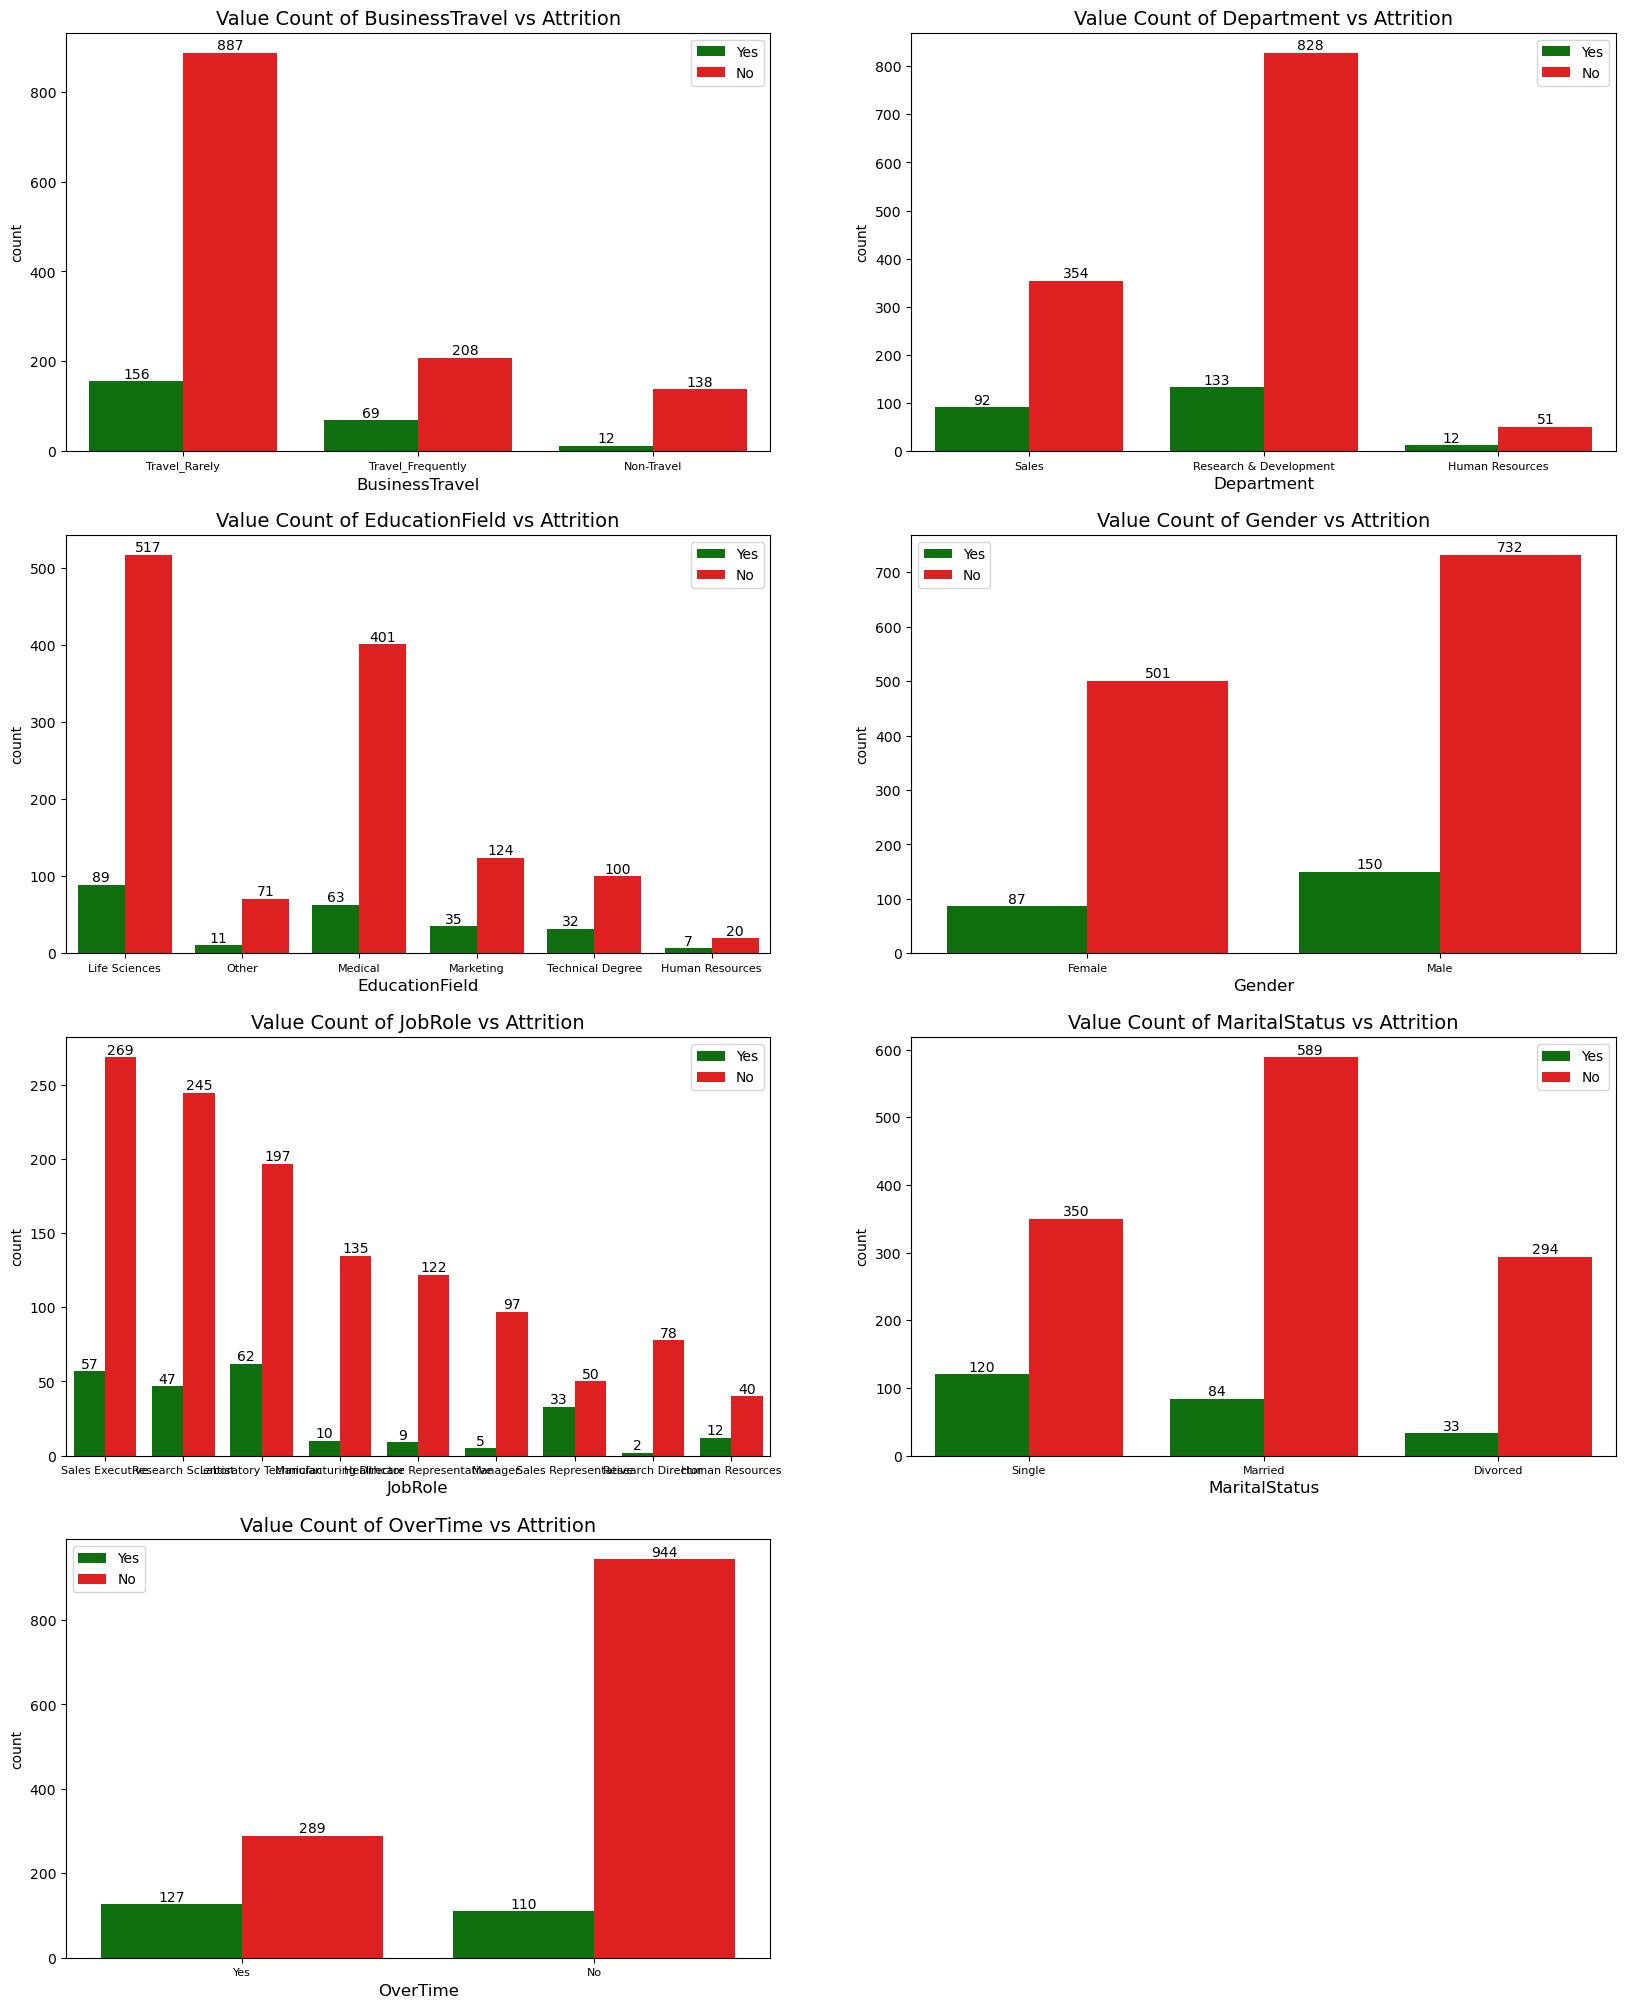

In [19]:
# Visualization of Categorical column Vs Attrition
plt.figure(figsize=(20,25))
p=1

for i in cat_col:
    if p<=8:
        plt.subplot(4,2,p)
        custom_palette = {"Yes": "g", "No": "r"} ## Define a custom color palette
        ax= sns.countplot(x=i, hue='Attrition',data=df, palette=custom_palette)
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'Value Count of {i} vs Attrition', fontsize=14)
        plt.xlabel(i, fontsize=12)
        plt.xticks(fontsize=8)
        plt.legend()
    p+=1
plt.show()

In [20]:
num_col

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [21]:
# Iterate through each categorical column
for col in num_col:
    # Group by 'Attrition' and the current categorical column
    attrition_counts = df.groupby(['Attrition', col])[col].count()
    
    # Calculate the total count for each category in the current column
    total_counts = df.groupby(col)['Attrition'].count()
    
    # Calculate the percentage of 'Attrition' for each category in the current column
    attrition_percentages = (attrition_counts / total_counts * 100).round(2)
    
    # Create a DataFrame to display the counts and percentages
    attrition_df = pd.concat([attrition_counts, attrition_percentages], axis=1, keys=['Count', 'Percentage'])
    
    # Print the results
    print(attrition_df)
    print('\n')

               Count  Percentage
Attrition Age                   
No        18       4       50.00
          19       3       33.33
          20       5       45.45
          21       7       53.85
          22      11       68.75
...              ...         ...
Yes       52       3       16.67
          53       2       10.53
          55       3       13.64
          56       3       21.43
          58       5       35.71

[82 rows x 2 columns]


                     Count  Percentage
Attrition DailyRate                   
No        102            1      100.00
          105            1      100.00
          106            1      100.00
          107            1      100.00
          111            3      100.00
...                    ...         ...
Yes       1474           1       50.00
          1475           2      100.00
          1479           1       50.00
          1485           1       33.33
          1496           1       50.00

[1021 rows x 2 columns]


            

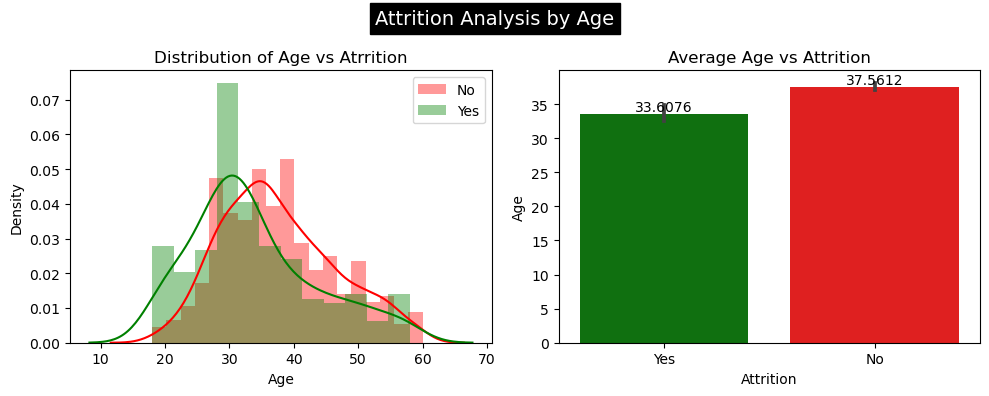

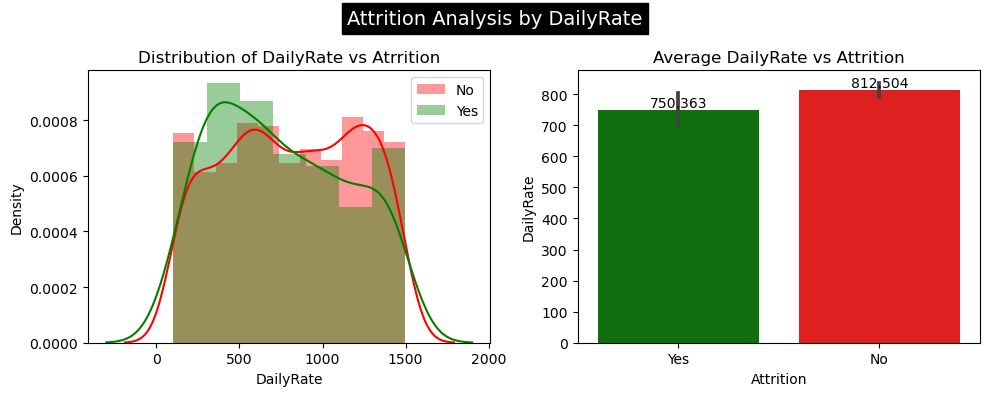

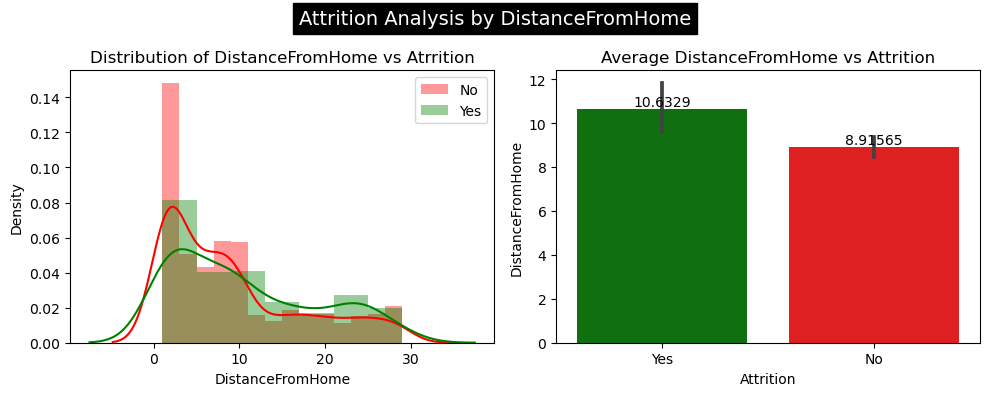

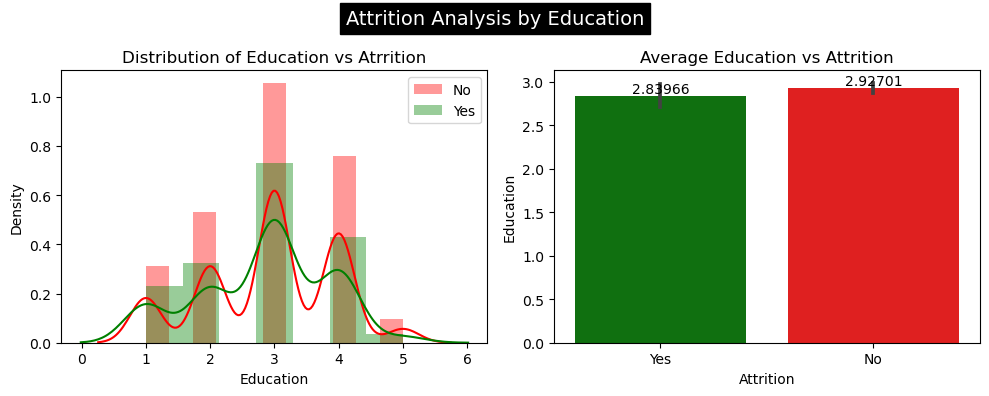

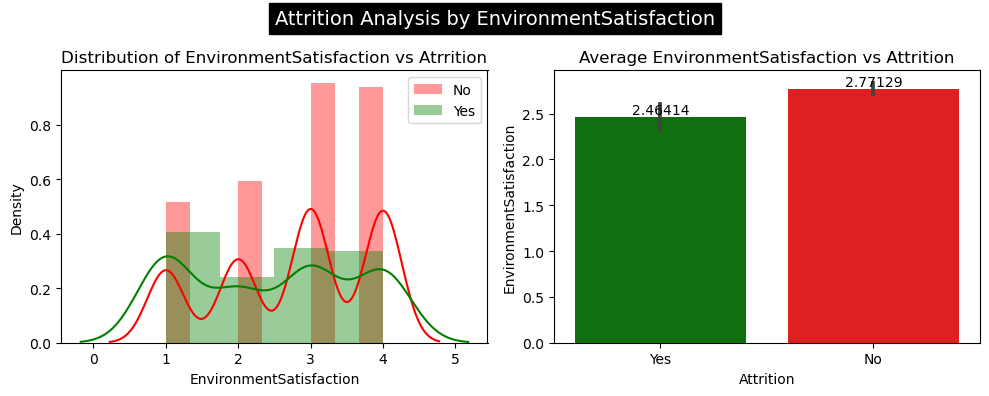

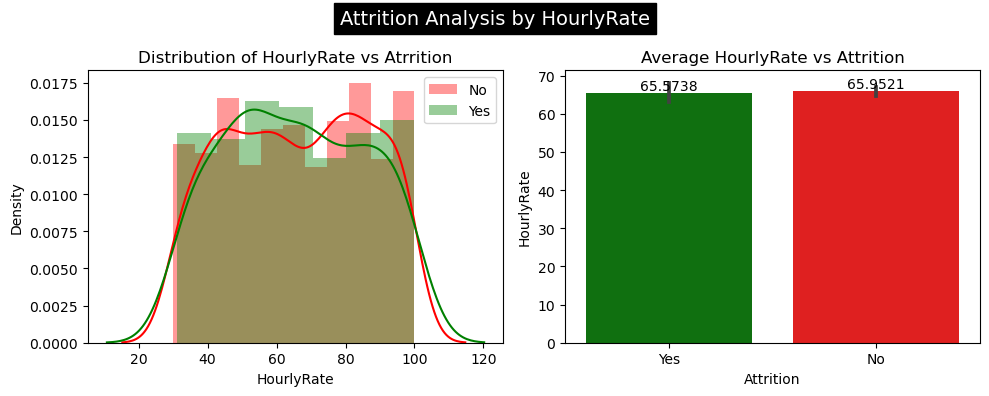

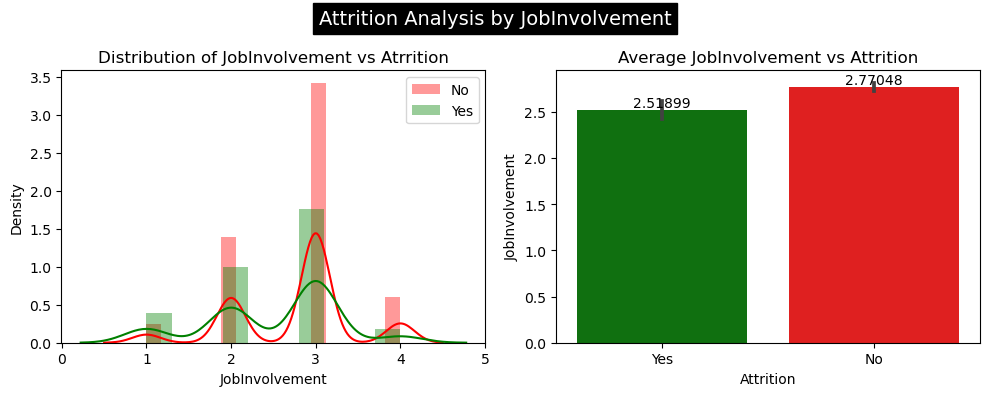

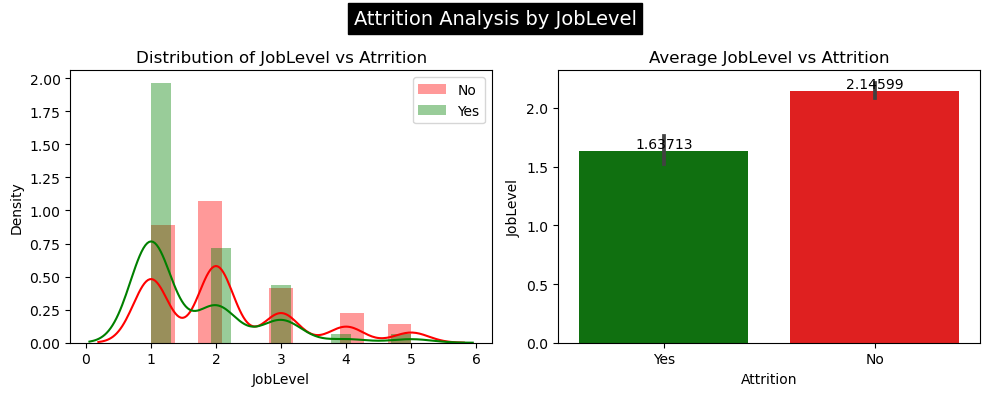

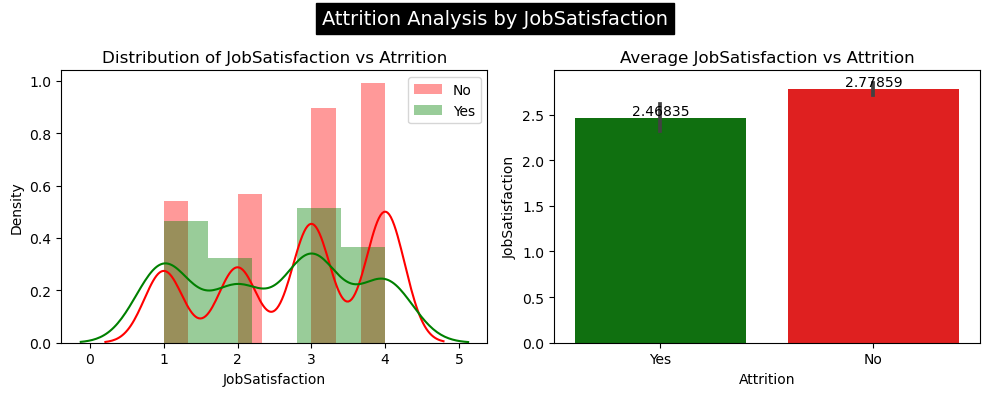

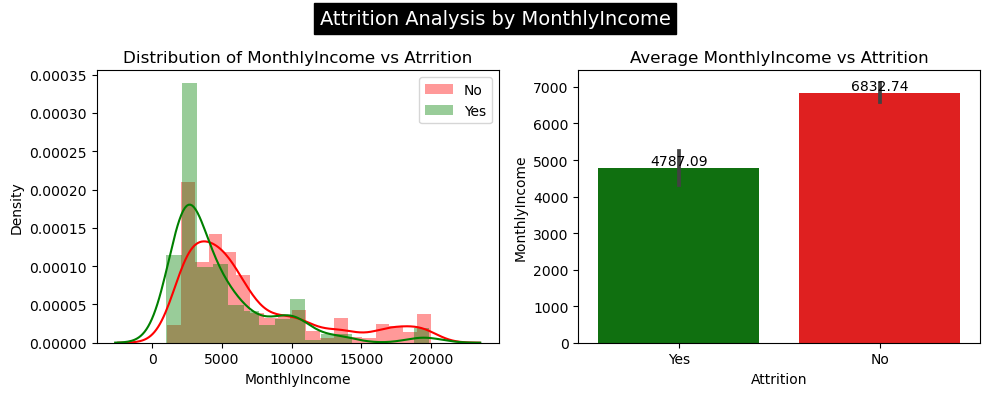

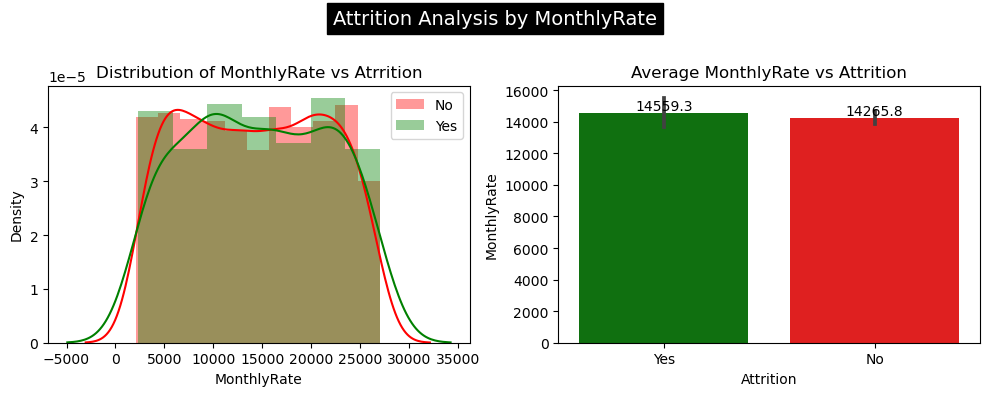

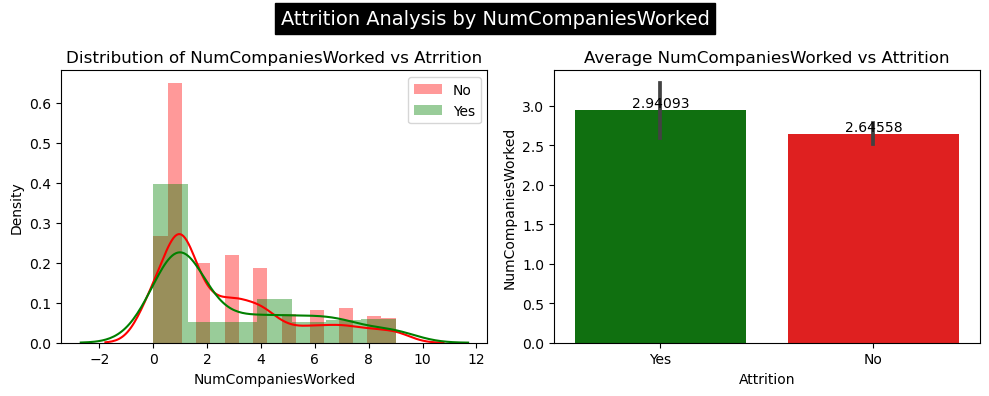

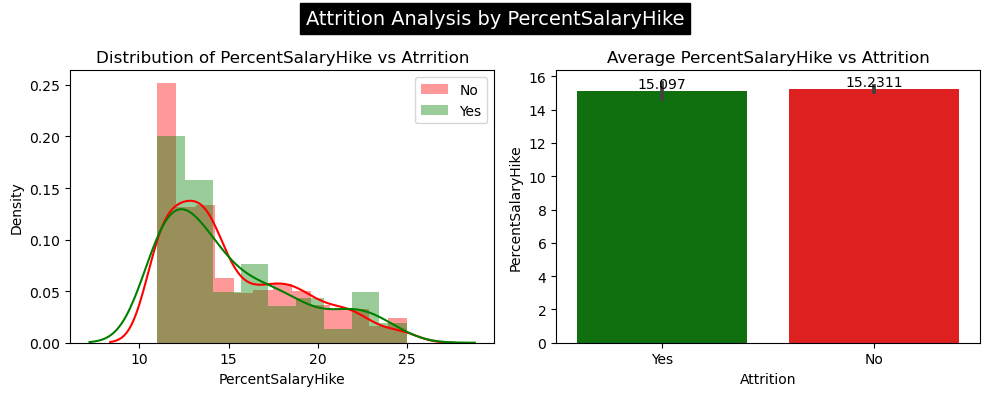

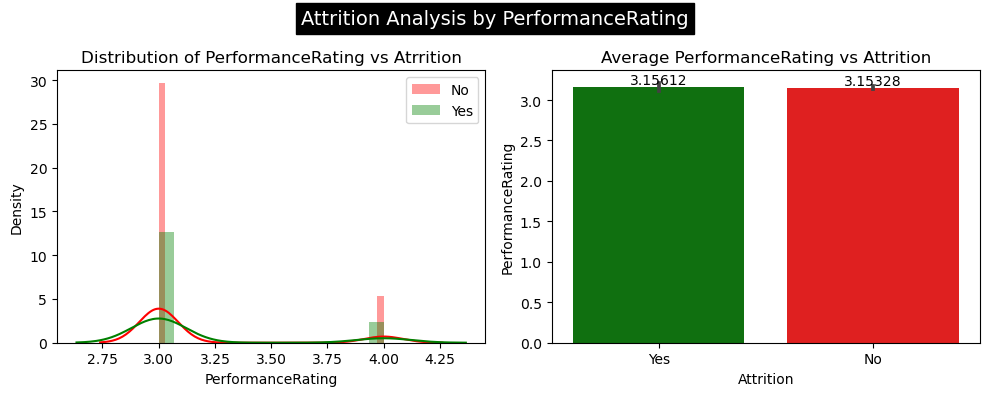

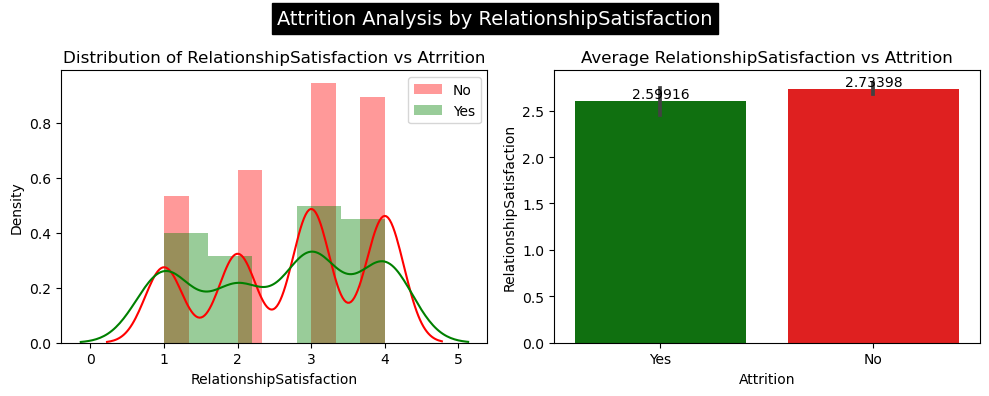

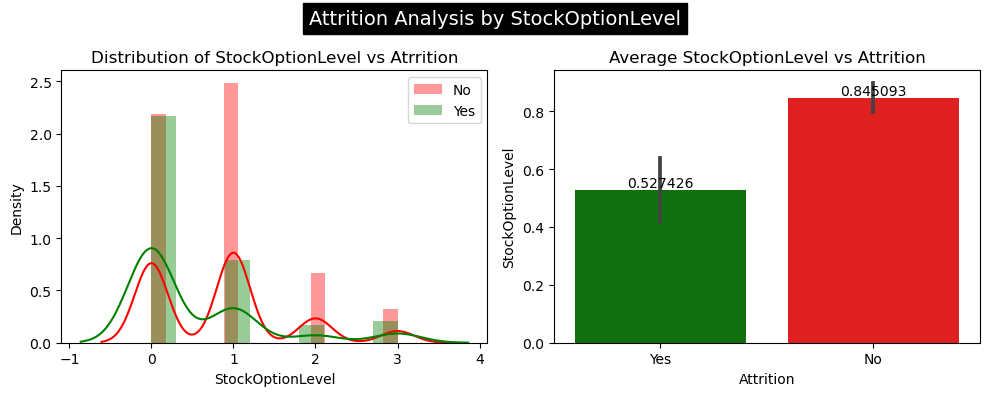

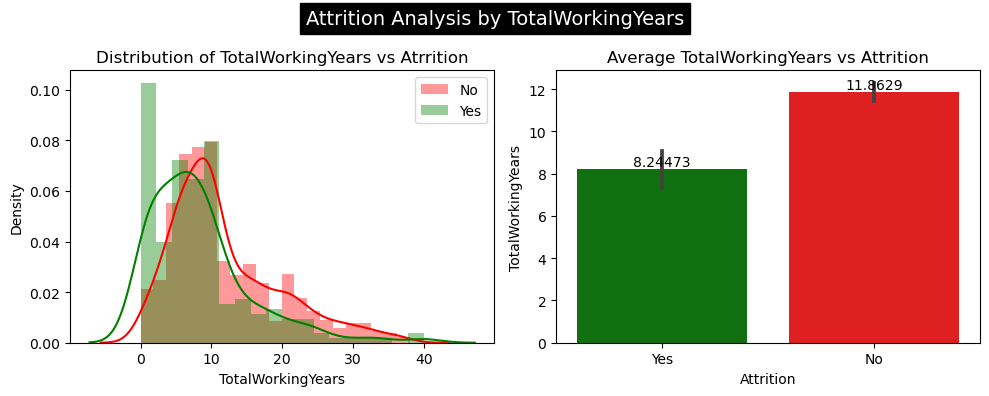

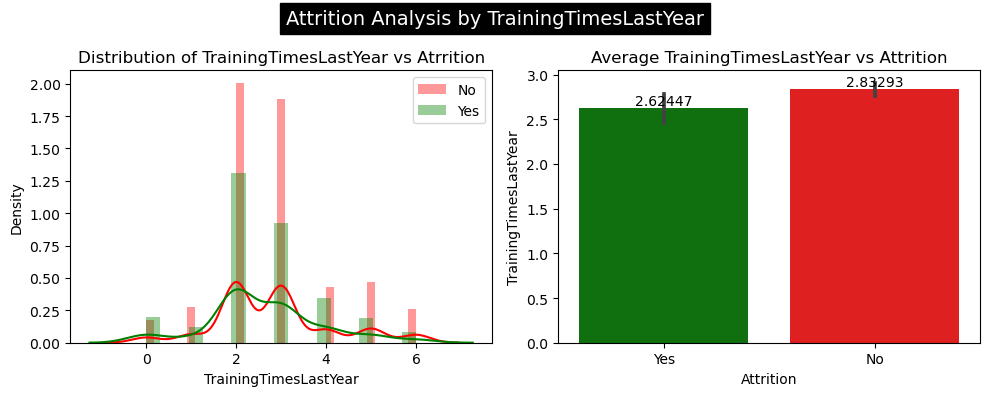

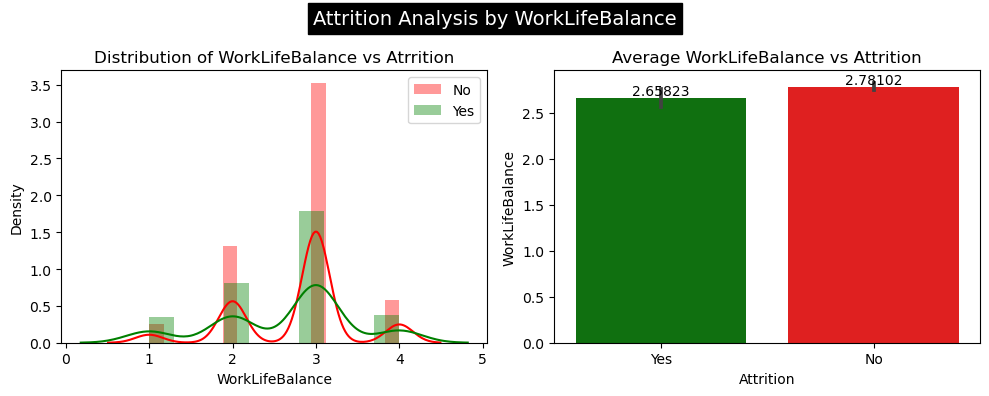

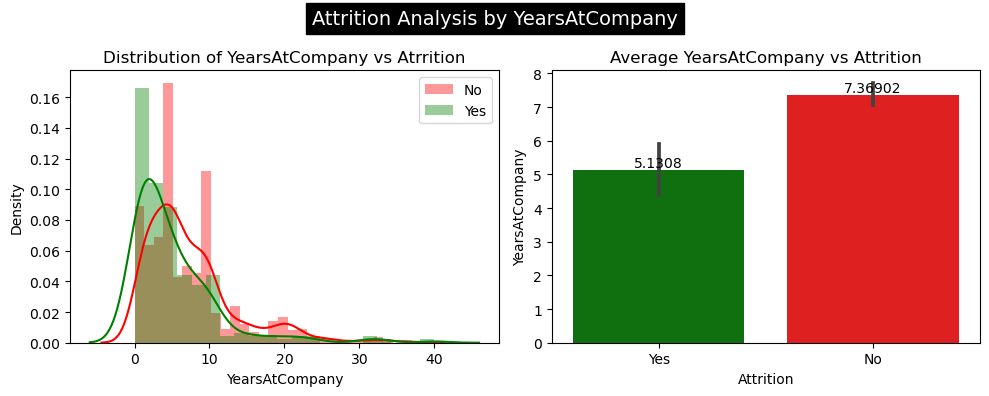

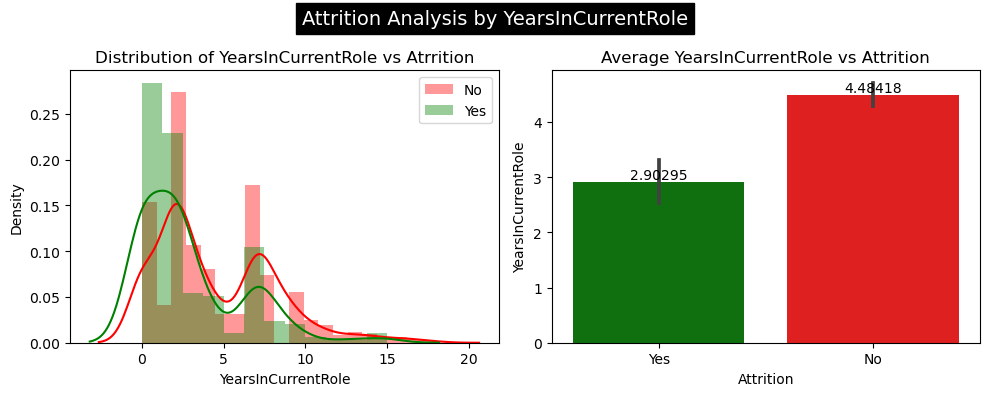

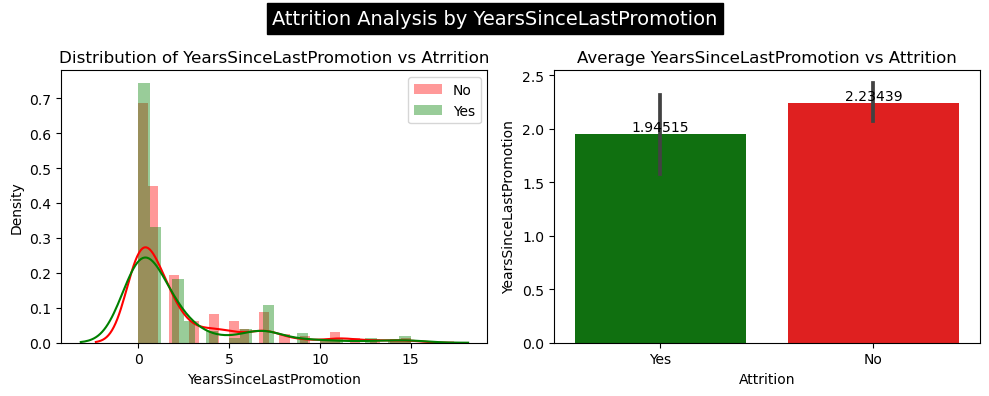

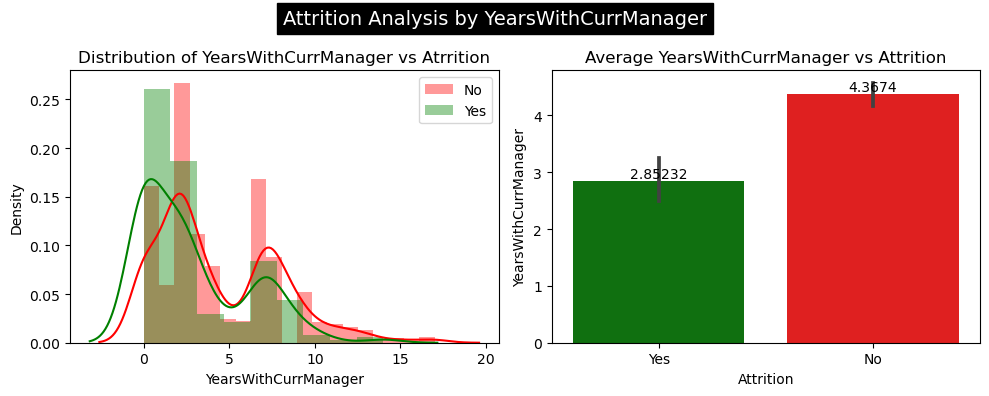

In [22]:
#Visualizing it using it
for i in num_col:
    
    #create Subplots
    fig, axes =plt.subplots(1,2,figsize=(10,4))
    
    # First Plot: Distribution of Numerical columns vs Atrrition
    sns.distplot(df[df['Attrition']=='No'][i], label= "No", color='r', ax=axes[0])
    sns.distplot(df[df['Attrition']=='Yes'][i],label="Yes", color='g', ax=axes[0])
    axes[0].set_title(f"Distribution of {i} vs Atrrition")
    axes[0].legend()
    
    # Second Plot: Avg. Numerical columns vs Attrition
    ax=sns.barplot(x='Attrition', y=i, data=df, palette={'Yes': "g", 'No': "r"}, ax=axes[1])
    for container in ax.containers:
        ax.bar_label(container)
    axes[1].set_title(f'Average {i} vs Attrition')
    
    fig.suptitle(f"Attrition Analysis by {i}", fontsize=14, backgroundcolor='black',color='white')  # Add a specific title for this column
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    # Show the plots
    plt.show()

# Multivariate Analysis

Attrition by Age & MonthlyIncome

<Figure size 500x1000 with 0 Axes>

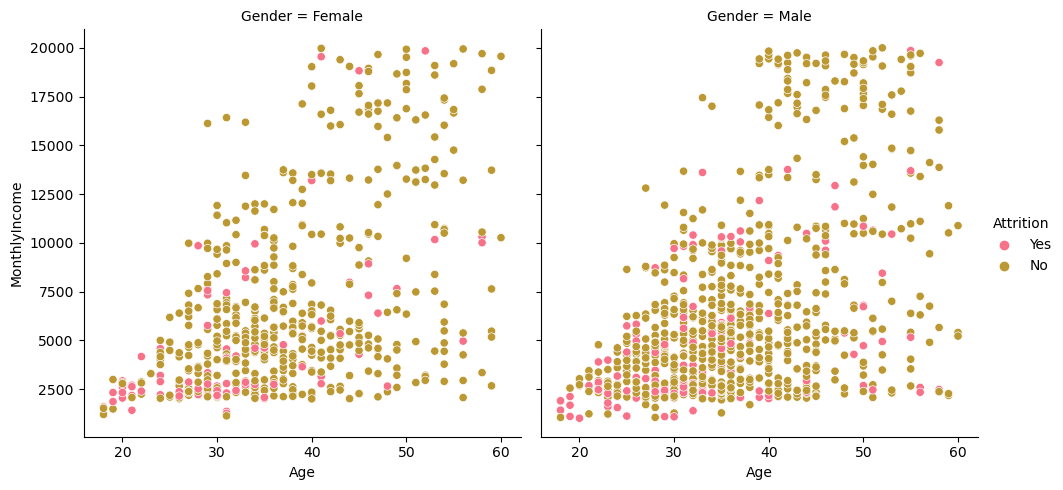

In [23]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

Attrition of Departmentby MonthlyIncome

In [24]:
# Comparing Department vs MonthlyIncome
print(df.groupby('Department')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by Department and Monthly Income
dept_income = df.groupby(['Attrition', 'Department'])['MonthlyIncome'].mean().reset_index()
print(dept_income)

               Department  MonthlyIncome
0         Human Resources    6654.507937
1  Research & Development    6281.252862
2                   Sales    6959.172646 

  Attrition              Department  MonthlyIncome
0        No         Human Resources    7345.980392
1        No  Research & Development    6630.326087
2        No                   Sales    7232.240113
3       Yes         Human Resources    3715.750000
4       Yes  Research & Development    4108.075188
5       Yes                   Sales    5908.456522


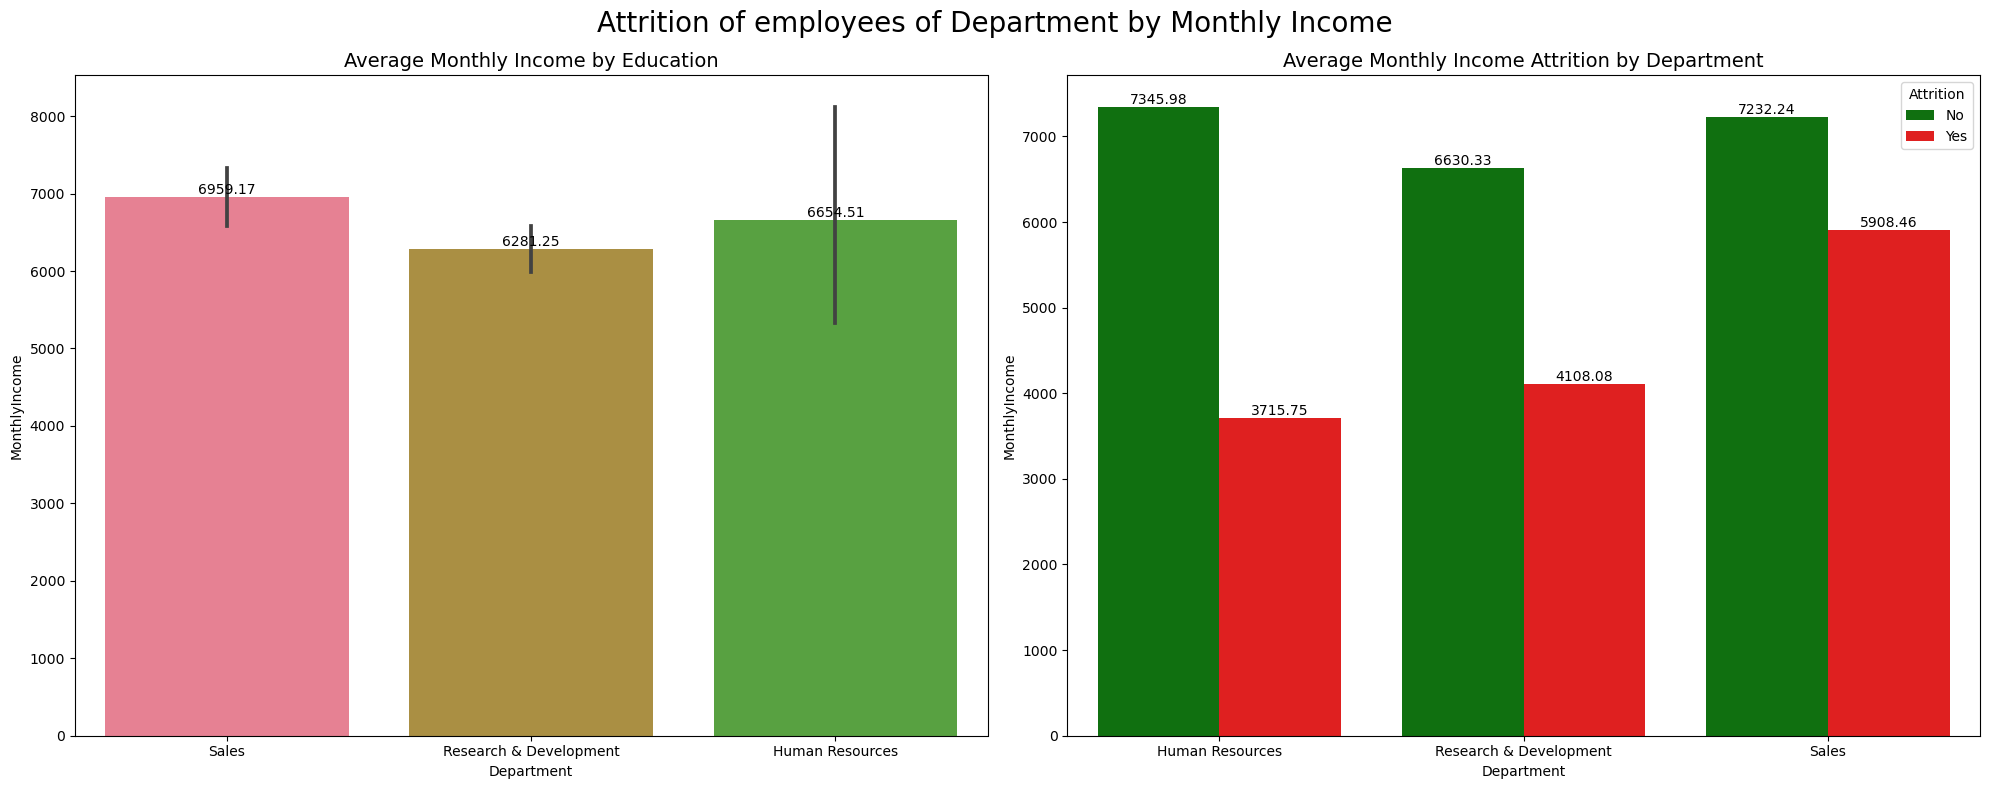

In [25]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First Plot: Comparing Department by Monthly Income
ax = sns.barplot(x='Department', y='MonthlyIncome', data=df, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container)
axes[0].set_title('Average Monthly Income by Education', fontsize=14)

# Second Plot: Attrition Rate of Department by Salary
ax = sns.barplot(y='MonthlyIncome', x='Department', hue='Attrition', data=dept_income, ax=axes[1],
                 palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
    ax.bar_label(container)
axes[1].set_title('Average Monthly Income Attrition by Department', fontsize=14)

fig.suptitle("Attrition of employees of Department by Monthly Income", fontsize=20)
plt.tight_layout()
plt.show()

In [26]:
# Comparing Education vs MonthlyIncome
print(df.groupby('Education')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by JobRole and Monthly Income
edu_income = df.groupby(['Attrition', 'Education'])['MonthlyIncome'].mean().reset_index()
print(edu_income )

   Education  MonthlyIncome
0          1    5640.570588
1          2    6226.645390
2          3    6517.263986
3          4    6832.402010
4          5    8277.645833 

  Attrition  Education  MonthlyIncome
0        No          1    5926.129496
1        No          2    6586.058824
2        No          3    6882.919662
3        No          4    7087.814706
4        No          5    8559.906977
5       Yes          1    4360.161290
6       Yes          2    4282.545455
7       Yes          3    4770.242424
8       Yes          4    5335.155172
9       Yes          5    5850.200000


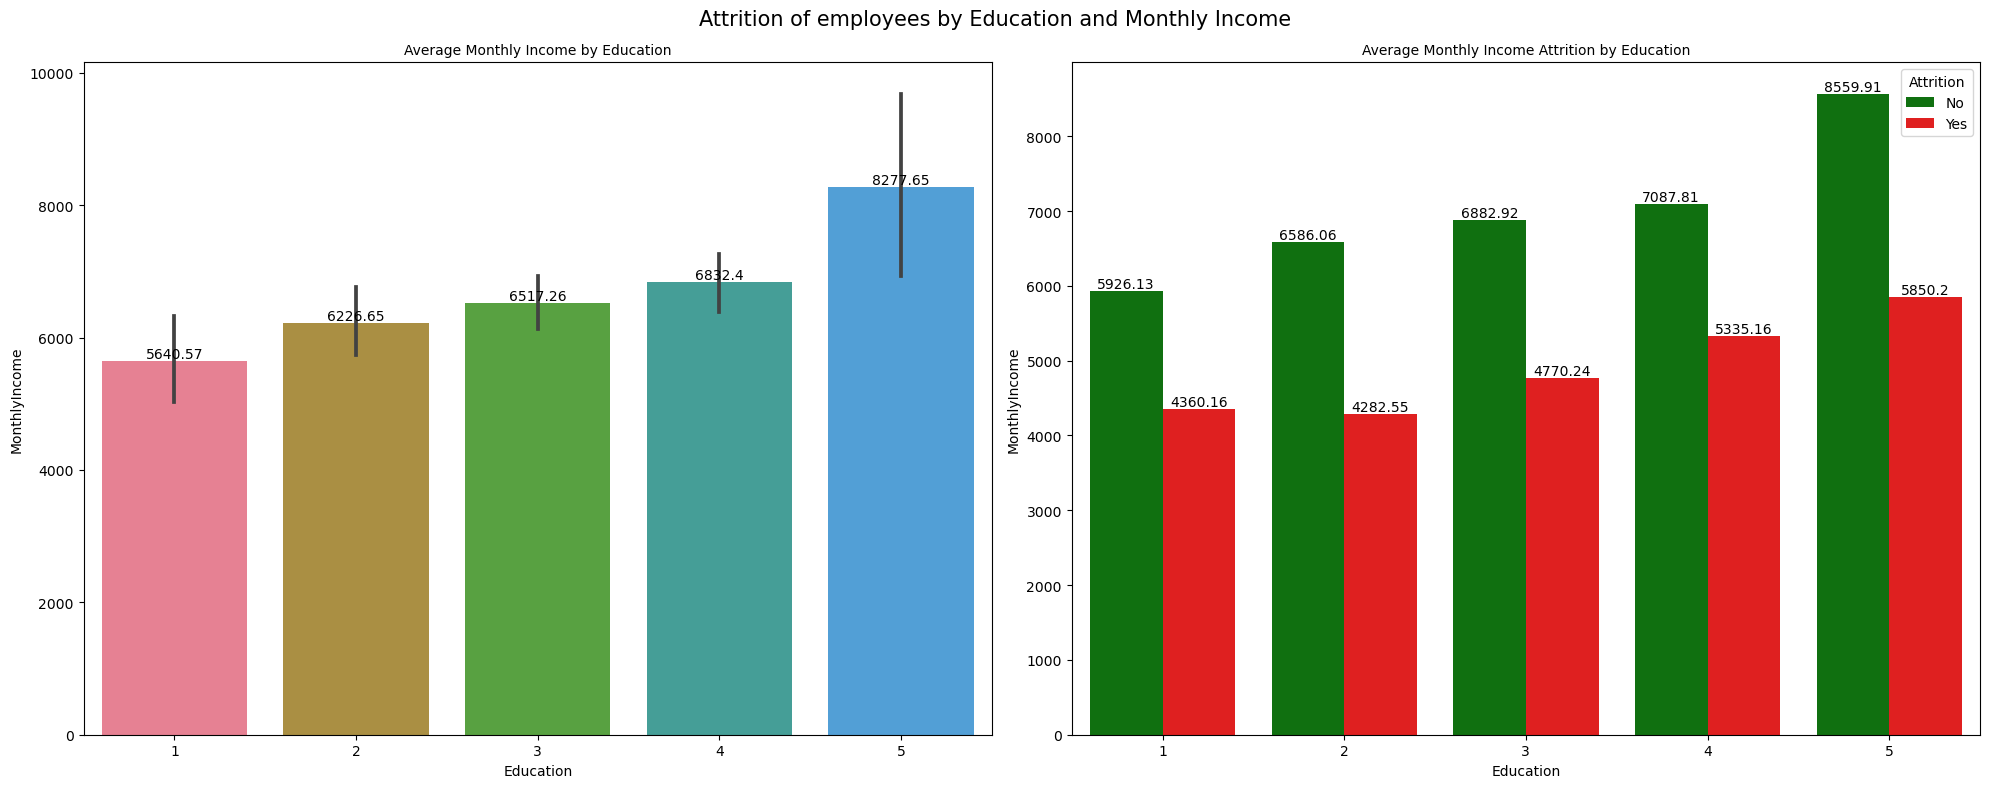

In [27]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First Plot: Comparing Education by Monthly Income
ax = sns.barplot(x='Education', y='MonthlyIncome', data=df, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container)
axes[0].set_title('Average Monthly Income by Education', fontsize=10)

# Second Plot: Attrition Rate by Education and Salary
ax = sns.barplot(x='Education', y='MonthlyIncome', hue='Attrition', data=edu_income, ax=axes[1],
                 palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
    ax.bar_label(container)
axes[1].set_title('Average Monthly Income Attrition by Education', fontsize=10)

fig.suptitle("Attrition of employees by Education and Monthly Income", fontsize=15)
plt.tight_layout()
plt.show()

Attrition by Job Role and Monthly Income

In [28]:
# Comparing JobRole vs MonthlyIncome
print(df.groupby('JobRole')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by JobRole and Monthly Income
jobrole_income = df.groupby(['Attrition', 'JobRole'])['MonthlyIncome'].mean().reset_index()
print(jobrole_income)

                     JobRole  MonthlyIncome
0  Healthcare Representative    7528.763359
1            Human Resources    4235.750000
2      Laboratory Technician    3237.169884
3                    Manager   17181.676471
4     Manufacturing Director    7295.137931
5          Research Director   16033.550000
6         Research Scientist    3239.972603
7            Sales Executive    6924.279141
8       Sales Representative    2626.000000 

   Attrition                    JobRole  MonthlyIncome
0         No  Healthcare Representative    7453.557377
1         No            Human Resources    4391.750000
2         No      Laboratory Technician    3337.223350
3         No                    Manager   17201.484536
4         No     Manufacturing Director    7289.925926
5         No          Research Director   15947.346154
6         No         Research Scientist    3328.122449
7         No            Sales Executive    6804.617100
8         No       Sales Representative    2798.440000
9       

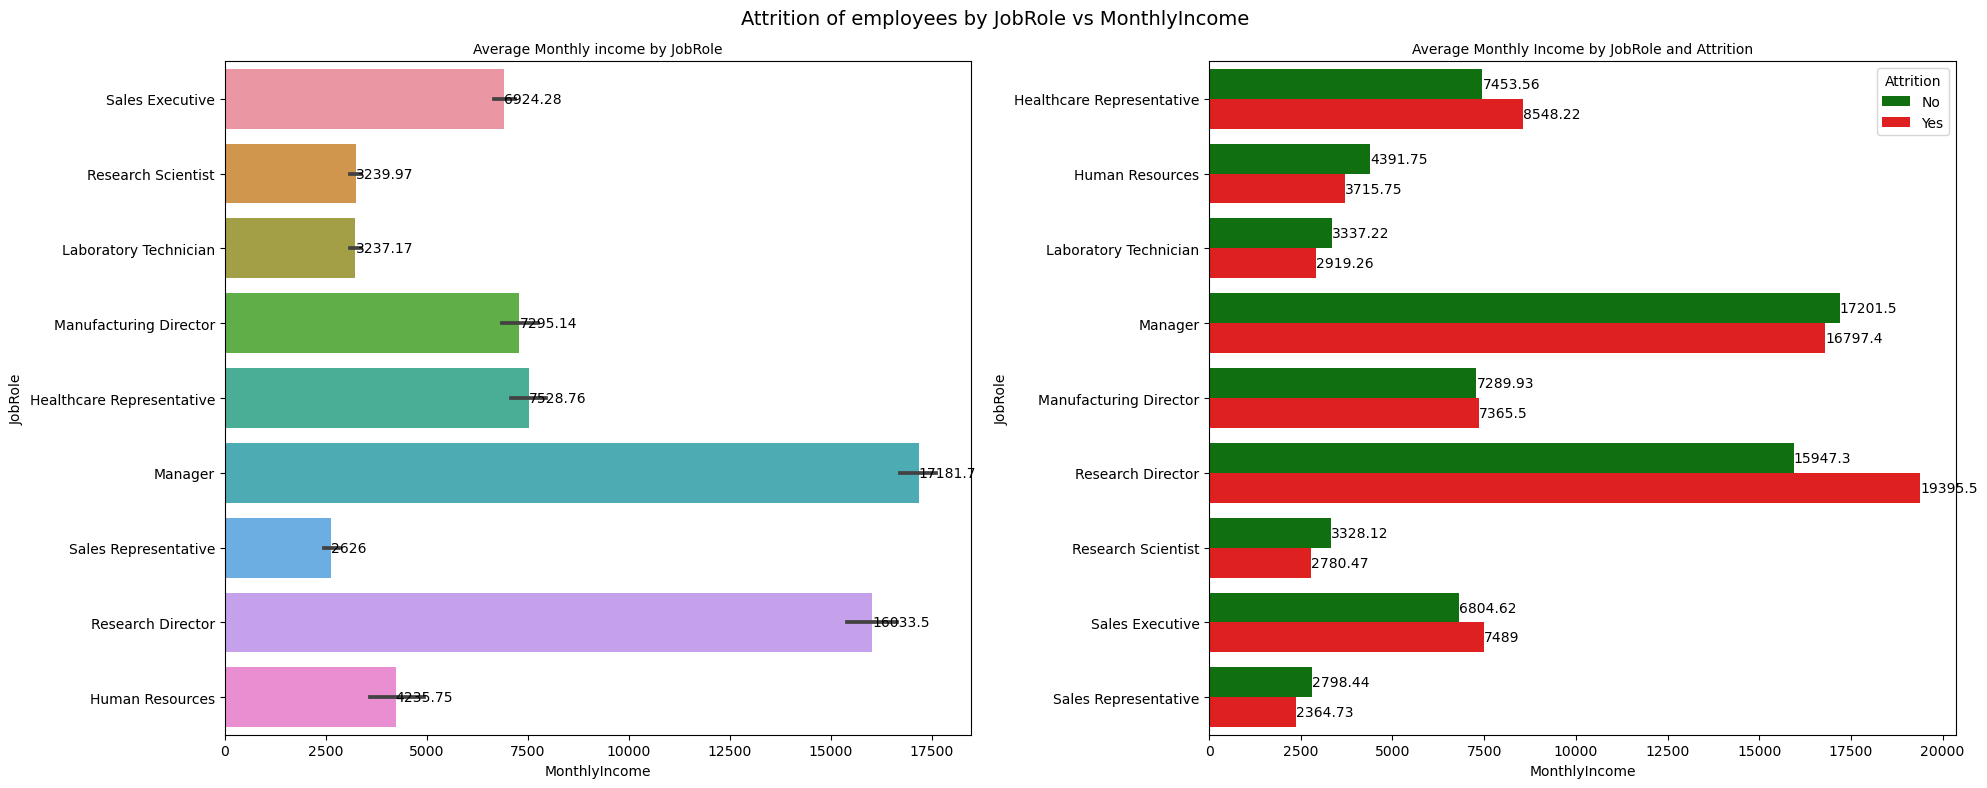

In [29]:
# Visualizing it
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Use plt.subplots to create subplots

# First Plot:Comparing JobRole by Monthly Income
ax= sns.barplot(x='MonthlyIncome', y='JobRole', data=df, ax=axes[0],)
for container in ax.containers:
        ax.bar_label(container)
axes[0].set_title('Average Monthly income by JobRole', fontsize=10)

# Second Plot: Attrition Rate of jobroles by Salary
ax= sns.barplot(y='JobRole', x='MonthlyIncome', hue='Attrition', data=jobrole_income, ax=axes[1],
            palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
        ax.bar_label(container)
axes[1].set_title('Average Monthly Income by JobRole and Attrition',fontsize=10)

fig.suptitle("Attrition of employees by JobRole vs MonthlyIncome", fontsize=14)
plt.tight_layout()
plt.show()

Attrition by Job Level and Monthly Income

In [30]:
# Comparing JobLevel vs MonthlyIncome
print(df.groupby('JobLevel')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by JobLevel and Monthly Income
joblvl_income = df.groupby(['Attrition', 'JobLevel'])['MonthlyIncome'].mean().reset_index()
print(joblvl_income)

   JobLevel  MonthlyIncome
0         1    2786.915285
1         2    5502.277154
2         3    9817.252294
3         4   15503.783019
4         5   19191.826087 

  Attrition  JobLevel  MonthlyIncome
0        No         1    2854.407500
1        No         2    5474.495851
2        No         3    9891.032258
3        No         4   15620.287129
4        No         5   19170.578125
5       Yes         1    2598.125874
6       Yes         2    5759.788462
7       Yes         3    9388.406250
8       Yes         4   13150.400000
9       Yes         5   19463.800000


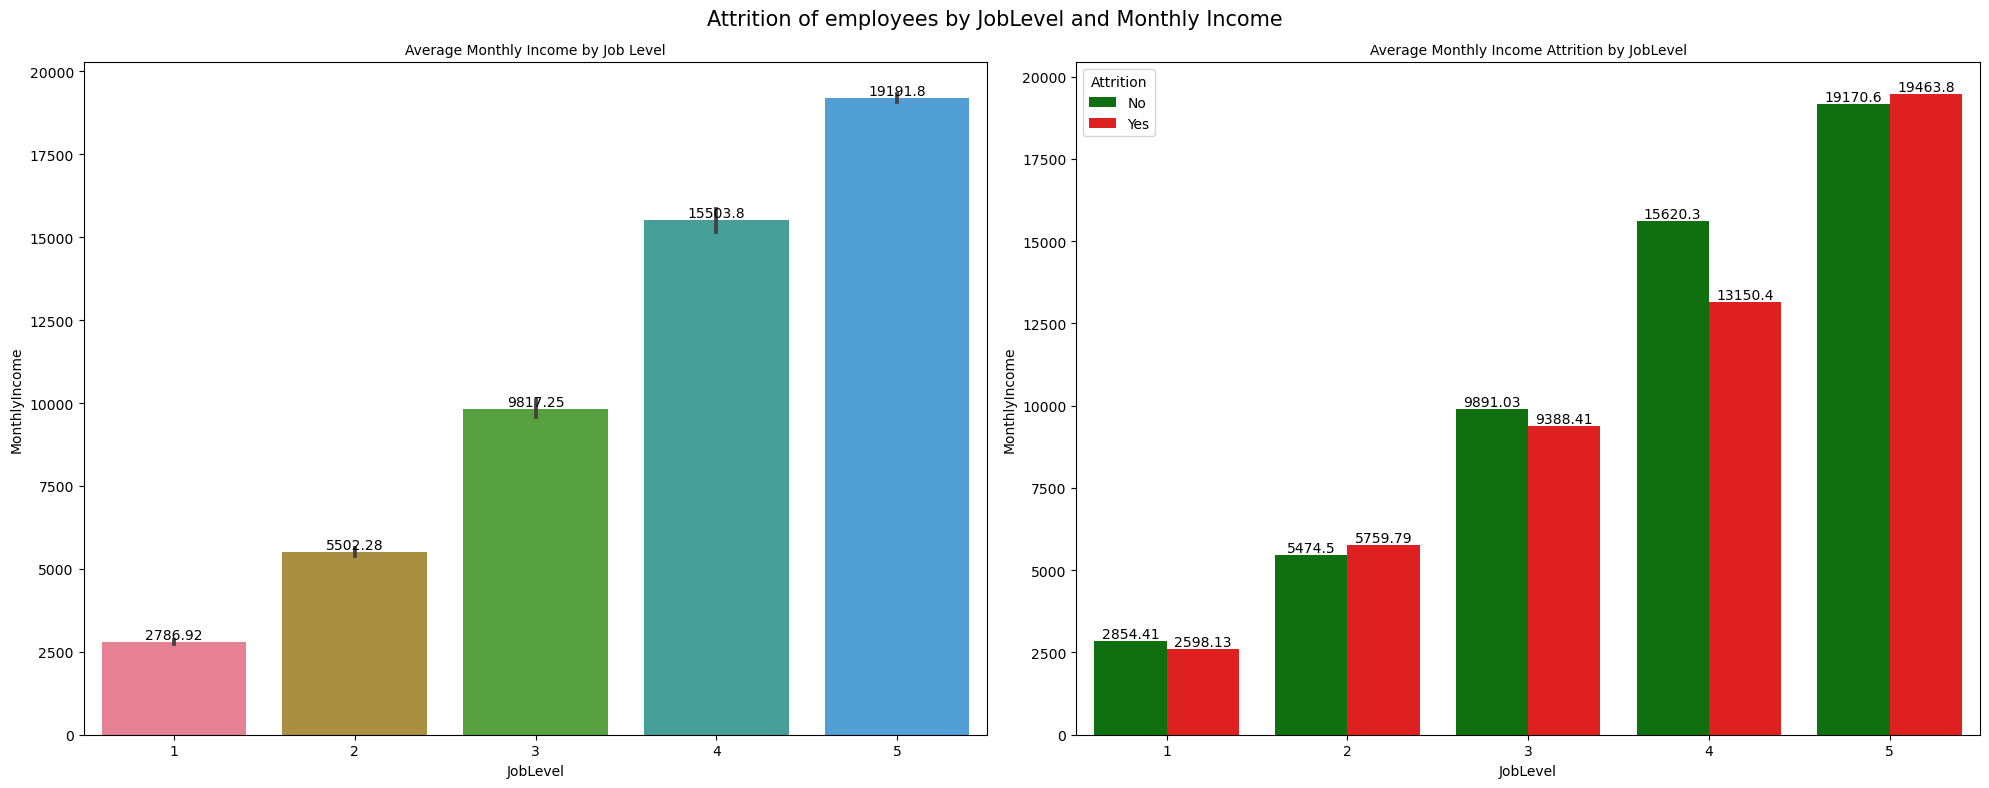

In [31]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First Plot: Comparing JobLevel by Monthly Income
ax = sns.barplot(x='JobLevel', y='MonthlyIncome', data=df, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container)
axes[0].set_title('Average Monthly Income by Job Level', fontsize=10)

# Second Plot: Attrition Rate by Job Level and Salary
ax = sns.barplot(x='JobLevel', y='MonthlyIncome', hue='Attrition', data=joblvl_income, ax=axes[1],
                 palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
    ax.bar_label(container)
axes[1].set_title('Average Monthly Income Attrition by JobLevel', fontsize=10)

fig.suptitle("Attrition of employees by JobLevel and Monthly Income", fontsize=15)
plt.tight_layout()
plt.show()

# Outliers Detection & Treatment

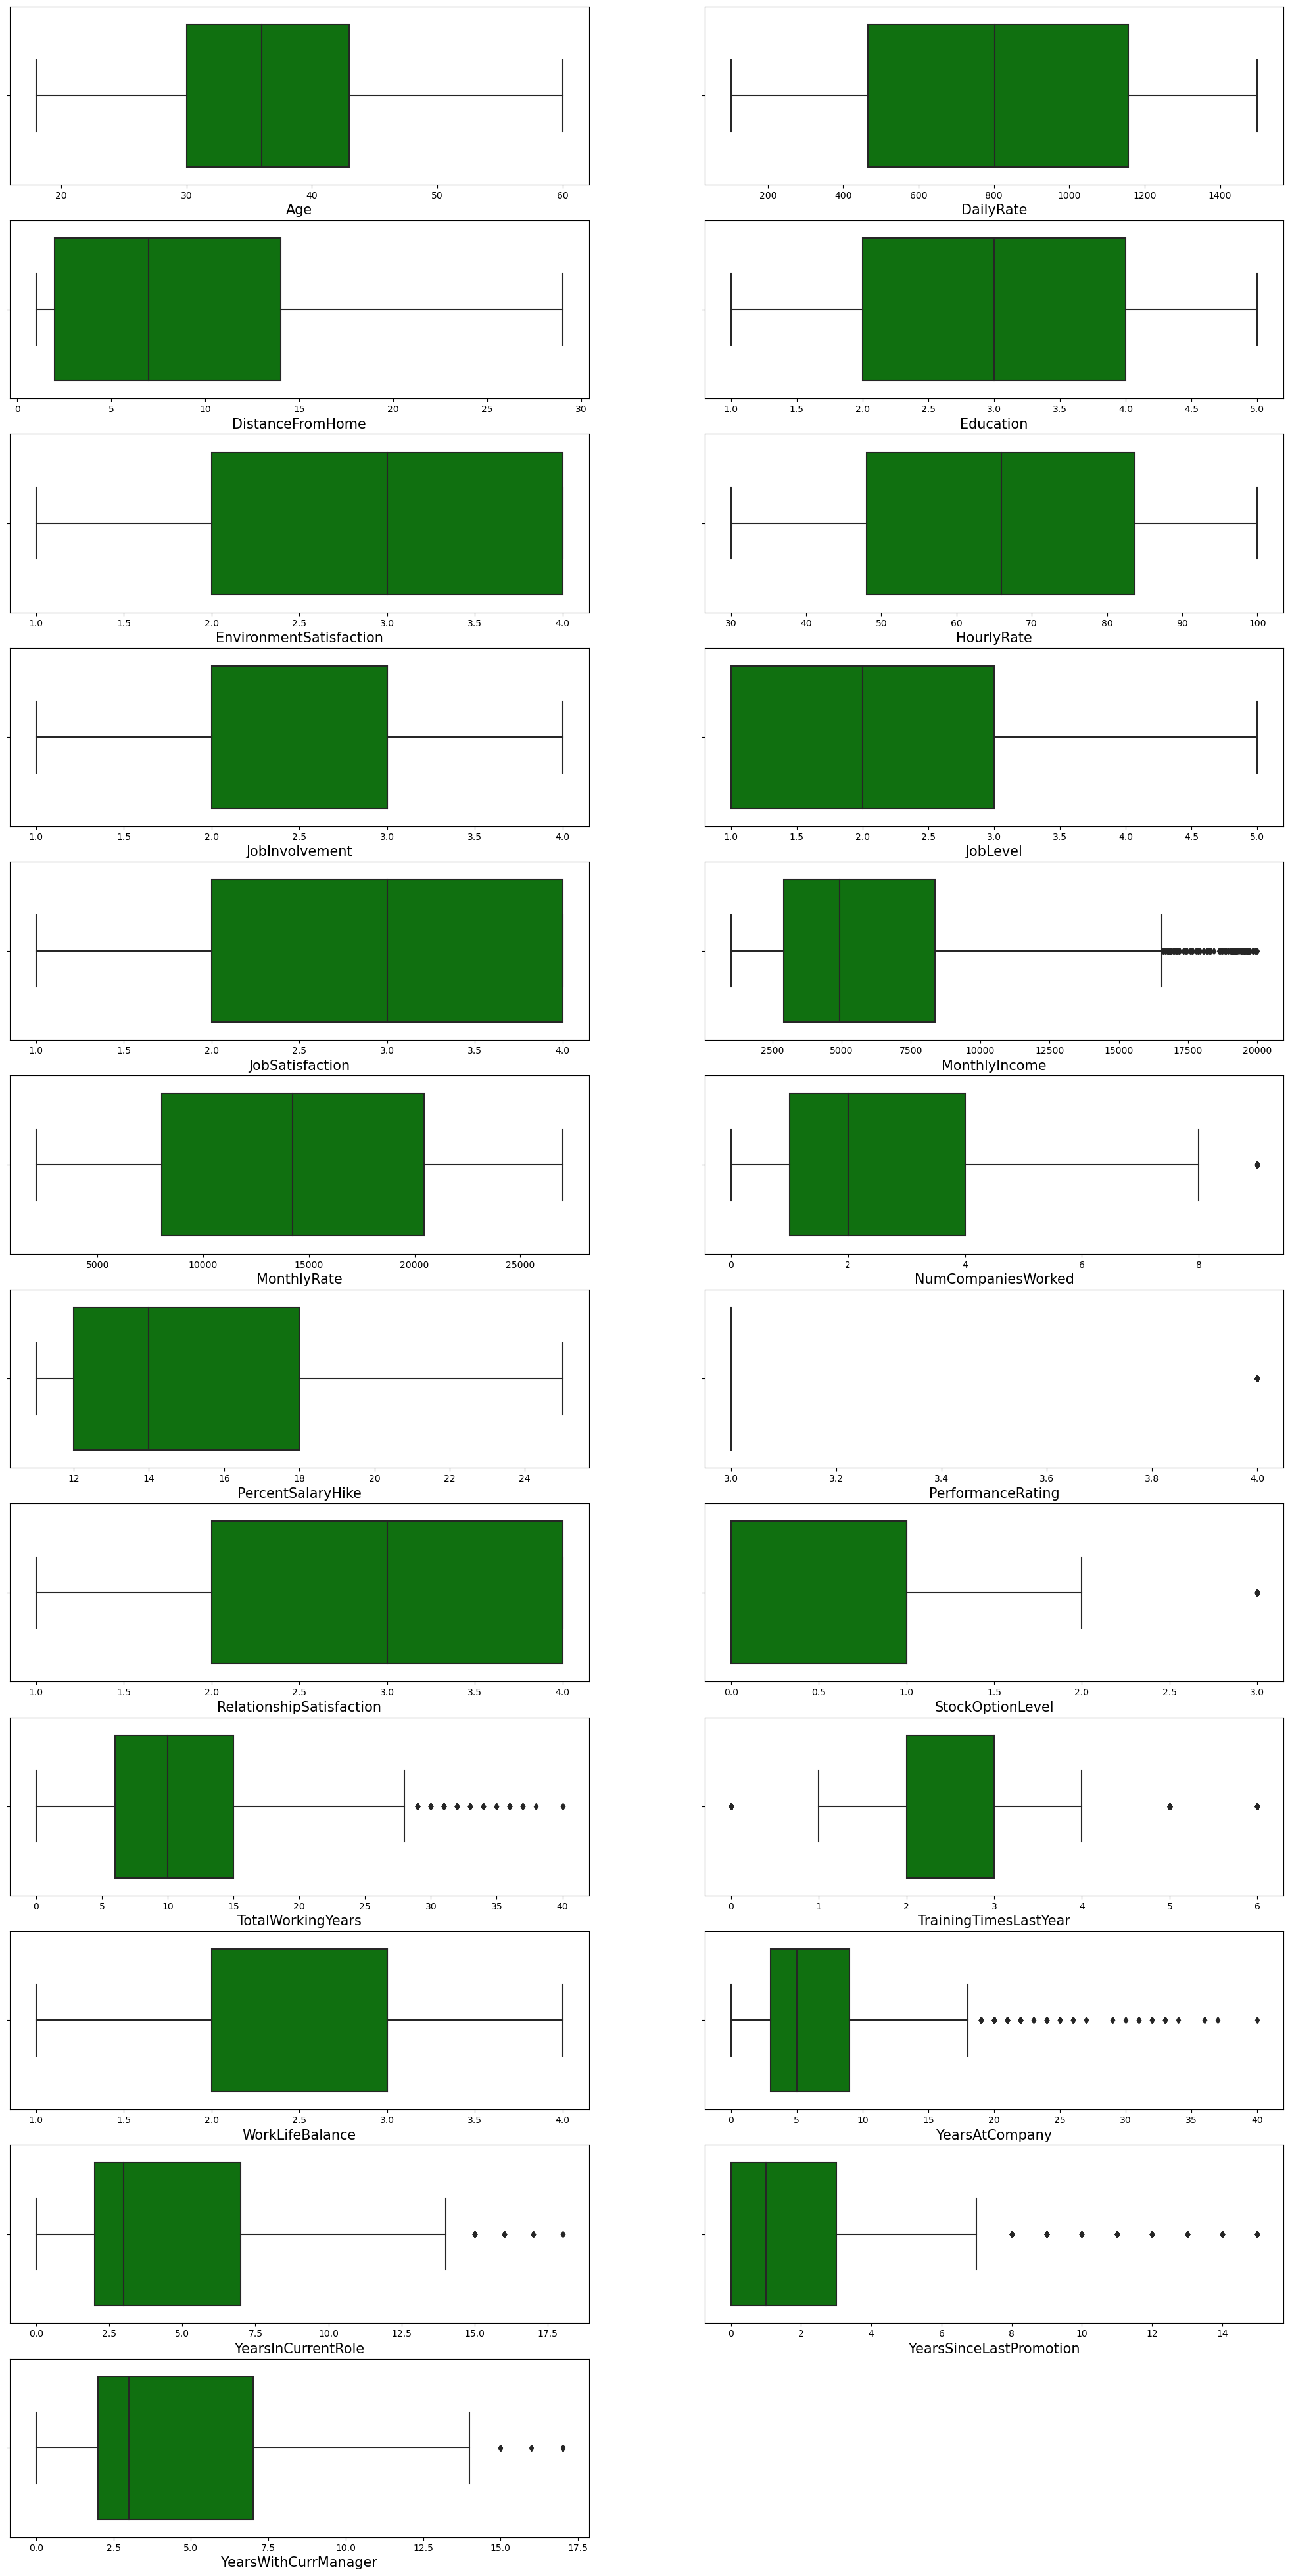

In [32]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in num_col:
    if plotnumber <=23:
        ax = plt.subplot(12,2,plotnumber)
        sns.boxplot(x= column, data=df, color = 'green')
        plt.xlabel(column,fontsize=15)

    plotnumber +=1
plt.show()

In [33]:
#convert category attributes with only 2 distinct values to numeric

# Define a dictionary for replacing 'yes' and 'no'
yes_no_mapping = {'Yes': 1, 'No': 0}

# Replace values in the specified columns
columns_to_replace = ['Attrition', 'OverTime']
df[columns_to_replace] = df[columns_to_replace].replace(yes_no_mapping)

In [34]:
#convert category attributes with more than 2 distinct values to numeric using label encoder

le=LabelEncoder()
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [35]:
df_cor =df.corr()
df_cor 

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
PercentSalaryHike          -0.007840          0.040235  -0.011111   
PerformanceRating          -0.024604          0.027110  -0.024539   
Relationshi

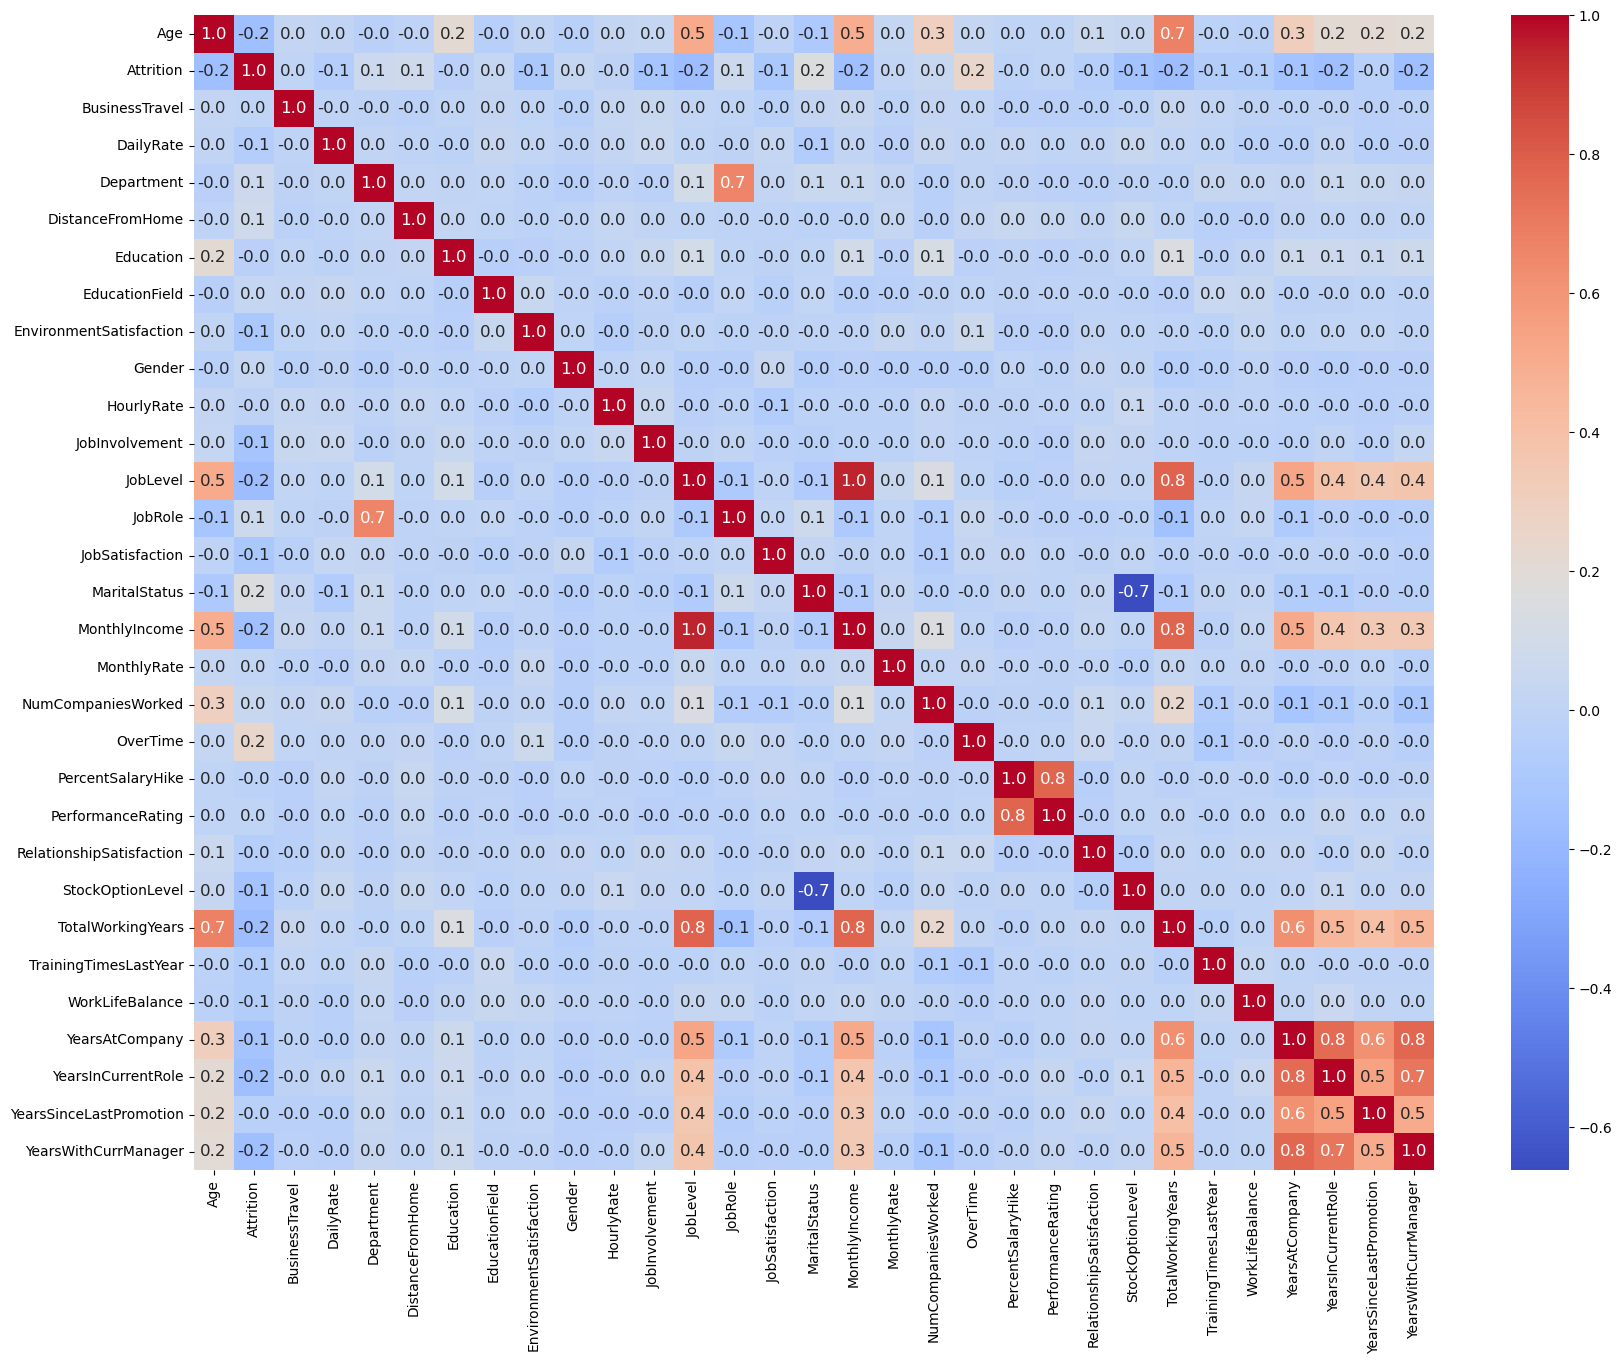

In [36]:
#visualizing it
plt.figure(figsize=(20, 15))
sns.heatmap(df_cor, annot=True, fmt='.1F', cmap='coolwarm', annot_kws={"size": 12})
plt.show()

In [40]:
#columns which are highly correlated with each other
correlation_threshold = 0.8
mask = df_cor.abs() >= correlation_threshold

features_to_drop = set()

for i in range(len(df_cor.columns)):
    for j in range(i+1, len(df_cor.columns)):
        if mask.iloc[i, j]:
            colname_i = df_cor.columns[i]
            colname_j = df_cor.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [38]:
features_to_drop

{'MonthlyIncome'}

In [39]:
df.drop(columns=['MonthlyIncome','YearsInCurrentRole', 'YearsWithCurrManager'],axis=1, inplace=True)

Checking Correlation with Target Column

In [41]:
#correlation with target column
correlation_with_target = df.corr()['Attrition'].abs().sort_values(ascending=False)
print(correlation_with_target)

Attrition                   1.000000
OverTime                    0.246118
TotalWorkingYears           0.171063
JobLevel                    0.169105
MaritalStatus               0.162070
Age                         0.159205
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
Education                   0.031373
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PercentSalaryHike           0.013478
HourlyRate                  0.006846
PerformanceRating           0.002889
B

In [42]:
df.drop(columns=['PerformanceRating' , 'HourlyRate','BusinessTravel'],axis=1, inplace=True)

In [43]:
df.shape

(1470, 25)

# Data Preprocessing

In [46]:
# Separating feature & Label

# Feature
x = df.drop(columns=["Attrition"])

# Target
y= df["Attrition"]

In [47]:
x.shape,y.shape

((1470, 24), (1470,))

# Feature Scaling

In [48]:
# Instantiate the Standard Scaler
scaler = StandardScaler()

# Fit and transform the scaler on the features
x_scaled = scaler.fit_transform(x)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
scaled_df

Age  DailyRate  Department  DistanceFromHome  Education  \
0     0.446350   0.742527    1.401512         -1.010909  -0.891688   
1     1.322365  -1.297775   -0.493817         -0.147150  -1.868426   
2     0.008343   1.414363   -0.493817         -0.887515  -0.891688   
3    -0.429664   1.461466   -0.493817         -0.764121   1.061787   
4    -1.086676  -0.524295   -0.493817         -0.887515  -1.868426   
...        ...        ...         ...               ...        ...   
1465 -0.101159   0.202082   -0.493817          1.703764  -0.891688   
1466  0.227347  -0.469754   -0.493817         -0.393938  -1.868426   
1467 -1.086676  -1.605183   -0.493817         -0.640727   0.085049   
1468  1.322365   0.546677    1.401512         -0.887515   0.085049   
1469 -0.320163  -0.432568   -0.493817         -0.147150   0.085049   

      EducationField  EnvironmentSatisfaction    Gender  JobInvolvement  \
0          -0.937414                -0.660531 -1.224745        0.379672   
1          -0.937414                 0.254625  0.816497       -1.026167   
2           1.316673                 1.169781  0.816497       -1.026167   
3          -0.937414                 1.169781 -1.224745        0.379672   
4           0.565311                -1.575686  0.816497        0.379672   
...              ...                      ...       ...             ...   
1465        0.565311                 0.254625  0.816497        1.785511   
1466        0.565311                 1.169781  0.816497       -1.026167   
1467       -0.937414                -0.660531  0.816497        1.785511   
1468        0.565311                 1.169781  0.816497       -1.026167   
1469        0.565311                -0.660531  0.816497        1.785511   

      JobLevel  ...  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0    -0.057788  ...            2.125136  1.591746          -1.150554   
1    -0.057788  ...           -0.678049 -0.628241           2.129306   
2    -0.961486  ...            1.324226  1.591746          -0.057267   
3    -0.961486  ...           -0.678049  1.591746          -1.150554   
4    -0.961486  ...            2.525591 -0.628241          -0.877232   
...        ...  ...                 ...       ...                ...   
1465 -0.057788  ...            0.523316 -0.628241           0.489376   
1466  0.845911  ...            0.523316 -0.628241          -0.057267   
1467 -0.057788  ...           -0.678049  1.591746           1.309341   
1468 -0.057788  ...           -0.277594 -0.628241          -0.330589   
1469 -0.057788  ...           -0.277594 -0.628241          -0.877232   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                    -1.584178         -0.932014          -0.421642   
1                     1.191438          0.241988          -0.164511   
2                    -0.658973         -0.932014          -0.550208   
3                     0.266233         -0.932014          -0.421642   
4                     1.191438          0.241988          -0.678774   
...                        ...               ...                ...   
1465                  0.266233          0.241988           0.735447   
1466                 -1.584178          0.241988          -0.293077   
1467                 -0.658973          0.241988          -0.678774   
1468                  1.191438         -0.932014           0.735447   
1469                 -1.584178         -0.932014          -0.678774   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 -2.171982        -2.493820       -0.164613   
1                  0.155707         0.338096        0.488508   
2                  0.155707         0.338096       -1.144294   
3                  0.155707         0.338096        0.161947   
4                  0.155707         0.338096       -0.817734   
...                     ...              ...             ...   
1465               0.155707         0.338096       -0.327893   
1466               1.707500         0.3

In [49]:
VIF= pd.DataFrame()
VIF['features']= scaled_df.columns
VIF['vif']=[variance_inflation_factor(scaled_df.values,i) for i in range(len(scaled_df.columns))]

In [50]:
VIF

features       vif
0                        Age  2.042307
1                  DailyRate  1.018723
2                 Department  1.900987
3           DistanceFromHome  1.010705
4                  Education  1.061566
5             EducationField  1.014940
6    EnvironmentSatisfaction  1.013456
7                     Gender  1.016747
8             JobInvolvement  1.011680
9                   JobLevel  2.745204
10                   JobRole  1.878808
11           JobSatisfaction  1.012264
12             MaritalStatus  1.836597
13               MonthlyRate  1.014191
14        NumCompaniesWorked  1.261272
15                  OverTime  1.025128
16         PercentSalaryHike  1.009138
17  RelationshipSatisfaction  1.017085
18          StockOptionLevel  1.808877
19         TotalWorkingYears  4.717327
20     TrainingTimesLastYear  1.022486
21           WorkLifeBalance  1.012846
22            YearsAtCompany  2.575683
23   YearsSinceLastPromotion  1.631108

# Handling Imbalanced Data

In [51]:
# Checking unique values of our target

y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [52]:
# Balance the Class distribution
sm=SMOTE()
x,y=sm.fit_resample(x_scaled,y)

In [53]:
y.value_counts()

Attrition
1    1233
0    1233
Name: count, dtype: int64

# Modelling Selection

In [55]:
#Choosing the Best Random State:
maxaccu=0
maxRS=0

for i in range(0,50):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7935222672064778 on Random State = 14


# Splitting Data for Train & Test

In [56]:
#Splitting Data for train & Test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

In [57]:
# Initialize all the models
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

# Create a list of models for iteration
models = [
    (LR_model, "Logistic Regression"),
    (RD_model, "Ridge Classifier"),
    (DT_model, "Decision Tree Classifier"),
    (SV_model, "Support Vector Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (XGB_model, "XGBoost Classifier"),
    (SGH_model, "SGD Classifier"),
    (Bag_model, "Bagging Classifier"),
    (ADA_model, "AdaBoost Classifier"),
    (GB_model, "Gradient Boosting Classifier")
]

# Model Evaluation

In [58]:
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in models:
    cross_val_scores = cross_val_score(model, x, y, cv=5)  # Adjust the number of folds as needed
    mean_accuracy = np.mean(cross_val_scores)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Add precision, recall, F1-score, and support as separate columns
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']
    
    model_performance = {
        "Model": model_name,
        "Cross-Validation Mean Accuracy": mean_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()]
    }

# Hyperparameter Tuning

In [59]:
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=RFR_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_rf = RandomForestClassifier(**best_params)

# Fit the best classifier on the training data
best_rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = best_rf.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.9190283400809717


# HyperParameter Tunning for XGBoost Classifier

In [60]:
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.5],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
    'reg_alpha': [0, 1],
    'reg_lambda': [1, 1.5]
}

# Reduce the number of cross-validation folds
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_xgb = XGBClassifier(**best_params)

# Fit the best classifier on the training data
best_xgb.fit(x_train, y_train)

# Make predictions on the test data
y_pred_xg = best_xgb.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_xg)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.9291497975708503
